# Projeto de Classificação Binária de Raio-X para Detecção de Pneumonia

### Objetivo:
Desenvolver um modelo de Deep Learning utilizando a biblioteca Keras para classificação binária de imagens de raio-x em dois grupos: pneumonia e normais.

### Subobjetivos:

- Pré-processamento dos Dados:
Carregar e normalizar as imagens de raio-x.
Dividir o conjunto de dados em treinamento e teste.
Aplicar técnicas de aumento de dados para aumentar a variabilidade do conjunto de treinamento.

- Seleção e Treinamento de Modelos Pré-treinados:
Utilizar arquiteturas de modelos pré-treinados como VGG16, InceptionV3, ResNet...
Realizar transfer learning para adaptar esses modelos ao problema específico.

- Adição de Camadas Densas:
Adicionar camadas densas para a classificação binária no topo dos modelos pré-treinados.
Utilizar funções de ativação apropriadas.

- Implementação de Técnicas de Normalização:
Testar tipos diferentes de normalização: formato de pixels (dividir todos os valores dos pixels por 255), Z-score, aumento de contraste usando transformação gama, Group Normalization, Layer Normalization e Batch Normalization avaliando o impacto na performance do modelo.

- Ajuste de Hiperparâmetros e Otimização:
Realizar experimentos para otimização de hiperparâmetros, como taxa de aprendizado, tamanho do lote, etc.

### Resumo:
O projeto visa desenvolver um sistema de classificação binária de imagens de raio-x para detecção de pneumonia. Isso é alcançado através da utilização de modelos pré-treinados e técnicas de normalização, como Batch Normalization, Layer Normalization e Group Normalization... O conjunto de dados é pré-processado, dividido em conjuntos de treinamento e teste, e técnicas de aumento de dados são aplicadas. Diferentes arquiteturas pré-treinadas são testadas e ajustadas através de transfer learning, e camadas densas são adicionadas para a tarefa de classificação.

#### Dificuldades Encontradas:

- Limitação do Uso de GPU:
A falta de recursos computacionais pode impactar a eficiência do treinamento dos modelos, aumentando o tempo necessário para obter resultados satisfatórios.

- Escolha e Ajuste dos Modelos Pré-treinados:
Encontrar a arquitetura de modelo pré-treinado mais adequada ao problema e ajustá-la corretamente para a classificação binária de raio-x.

- Seleção da Técnica de Normalização:
Avaliar o desempenho das diferentes técnicas de normalização e determinar qual delas se adapta melhor ao contexto do problema.

- Ajuste de Hiperparâmetros:
A definição dos hiperparâmetros (taxa de aprendizado, tamanho do lote, etc.) é crucial para obter um modelo bem treinado e generalizável.

- Interpretação e Avaliação dos Resultados:
Avaliar de forma precisa a performance do modelo, interpretar os resultados e garantir que o sistema seja clinicamente útil na detecção de pneumonia a partir de imagens de raio-x.

# Projeto:

In [5]:
from google.colab import files

files.upload()
# Abrirá um seletor de arquivos para fazer upload do arquivo JSON com username e key do kaggle(uso pessoal)

ModuleNotFoundError: No module named 'google.colab'

In [2]:
# Configurar as credenciais da API do Kaggle de forma segura
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Carregando as imagens
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# Descompactando o arquivo zip
!unzip chest-xray-pneumonia.zip >/dev/null

100% 2.28G/2.29G [00:23<00:00, 175MB/s]
100% 2.29G/2.29G [00:23<00:00, 105MB/s]


In [3]:
# Tamnho das imagens
size=224,224

In [4]:
# Função para treinamento / teste
import time
# Criar uma lista de listas para armazenar os dados
metrics = []
def treinamento(model, epocas, nome):
  start= time.time()
  # Compile o modelo com a função de perda adequada para classificação binária
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  import matplotlib.pyplot as plt
  import seaborn as sns
  from tensorflow.keras.callbacks import EarlyStopping

  # Treinamento do modelo com histórico
  history = model.fit(train_dataset, epochs=epocas, validation_data=test_dataset)

  # Extrair métricas do histórico
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  # Plotar histórico de perda
  plt.figure(figsize=(9, 4))
  sns.set_style("whitegrid")
  plt.plot(range(1, epocas + 1), train_loss, label='Loss (Treinamento)')
  plt.plot(range(1, epocas + 1), val_loss, label='Loss (Validação)')
  plt.title('Histórico de Loss')
  plt.xlabel('Épocas')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Plotar histórico de acurácia
  plt.figure(figsize=(9, 4))
  sns.set_style("whitegrid")
  plt.plot(range(1, epocas + 1), train_accuracy, label='Acurácia (Treinamento)')
  plt.plot(range(1, epocas + 1), val_accuracy, label='Acurácia (Validação)')
  plt.title('Histórico de Acurácia')
  plt.xlabel('Épocas')
  plt.ylabel('Acurácia')
  plt.legend()
  plt.show()

  import numpy as np
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

  # Previsões no conjunto de teste
  y_pred = model.predict(test_dataset)
  y_pred = np.round(y_pred).flatten()  # Arredonda as previsões para 0 ou 1

  # Rótulos verdadeiros no conjunto de teste
  y_true = []
  for images, labels in test_dataset:
      y_true.extend(labels.numpy().astype(int))

  y_true = np.array(y_true)

  # Calcula as métricas
  accuracy = round(((accuracy_score(y_true, y_pred))*100),2)
  precision = round(((precision_score(y_true, y_pred))*100),2)
  recall = round(((recall_score(y_true, y_pred))*100),2)
  f1 = round(((f1_score(y_true, y_pred))*100),2)
  conf_matrix = confusion_matrix(y_true, y_pred)
  end=time.time()
  fim = round(((end-start)/60),0)

  # Adicionar os dados de cada métrica como uma lista
  metrics.append({'nome': nome, "Accuracy": accuracy, "Precision": precision,"Recall": recall,"F1 Score": f1,"Time (minutes)": fim})

  # Exibe as métricas
  print('')
  print('')
  print(f'Modelo: {nome}')
  print(f'Tempo: {fim} min')
  print(f"Acurácia: {accuracy}")
  print(f"Precisão: {precision}")
  print(f"Recall: {recall}")
  print(f"F1-Score: {f1}")
  print("Matriz de Confusão:")
  print(conf_matrix)
  print('')
  print('')
  print('')

In [5]:
import tensorflow as tf
print("Número de GPUs disponíveis:", len(tf.config.experimental.list_physical_devices('GPU')))

Número de GPUs disponíveis: 1


# Parte I

In [ ]:
# Com normalização simples
import numpy as np
import os
from PIL import Image

lista=['/content/chest_xray/test/NORMAL', '/content/chest_xray/test/PNEUMONIA','/content/chest_xray/train/NORMAL','/content/chest_xray/train/PNEUMONIA','/content/chest_xray/val/NORMAL','/content/chest_xray/val/PNEUMONIA']
destino=['/content/test_resized/NORMAL','/content/test_resized/PNEUMONIA','/content/train_resized/NORMAL','/content/train_resized/PNEUMONIA','/content/val_resized/NORMAL','/content/val_resized/PNEUMONIA']

for source_directory, destination_directory in zip(lista, destino):
    # Criação da pasta de destino
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Tamanho desejado
    target_size = (size)

    # Inicialize a contagem de imagens
    num_images = 0

    # Iterar sobre as imagens no diretório de origem
    for filename in os.listdir(source_directory):
        if filename.endswith(".jpeg") or filename.endswith(".png"):
            source_path = os.path.join(source_directory, filename)
            img = Image.open(source_path)

            # Redimensionamento
            resized_img = img.resize(target_size, Image.LANCZOS)

            # Normalização
            normalized_img = resized_img.convert("RGB")
            normalized_img = np.array(normalized_img) / 255.0  # Convertendo para array NumPy e normalizando

            destination_path = os.path.join(destination_directory, filename)
            normalized_img = Image.fromarray((normalized_img * 255).astype(np.uint8))  # Convertendo de volta para imagem PIL
            normalized_img.save(destination_path)

            # Incrementa a contagem de imagens
            num_images += 1

    print(f"Foram processadas {num_images} imagens em {destination_directory}.")


Foram processadas 234 imagens em /content/test_resized/NORMAL.
Foram processadas 390 imagens em /content/test_resized/PNEUMONIA.
Foram processadas 1341 imagens em /content/train_resized/NORMAL.
Foram processadas 3875 imagens em /content/train_resized/PNEUMONIA.
Foram processadas 8 imagens em /content/val_resized/NORMAL.
Foram processadas 8 imagens em /content/val_resized/PNEUMONIA.


In [ ]:
# # Sem normalização
# import os
# from PIL import Image

# lista=['/content/chest_xray/test/NORMAL', '/content/chest_xray/test/PNEUMONIA','/content/chest_xray/train/NORMAL','/content/chest_xray/train/PNEUMONIA','/content/chest_xray/val/NORMAL','/content/chest_xray/val/PNEUMONIA']
# destino=['/content/test_resized/NORMAL','/content/test_resized/PNEUMONIA','/content/train_resized/NORMAL','/content/train_resized/PNEUMONIA','/content/val_resized/NORMAL','/content/val_resized/PNEUMONIA']

# for source_directory, destination_directory in zip(lista, destino):
#     # Criação da pasta de destino
#     if not os.path.exists(destination_directory):
#         os.makedirs(destination_directory)

#     # Tamanho desejado
#     target_size = (size)

#     # Inicialize a contagem de imagens
#     num_images = 0

#     # Iterar sobre as imagens no diretório de origem
#     for filename in os.listdir(source_directory):
#         if filename.endswith(".jpeg") or filename.endswith(".png"):
#             source_path = os.path.join(source_directory, filename)
#             img = Image.open(source_path)

#             # Redimensionamento
#             resized_img = img.resize(target_size, Image.LANCZOS)

#             destination_path = os.path.join(destination_directory, filename)
#             resized_img.save(destination_path)

#             # Incrementa a contagem de imagens
#             num_images += 1

#     print(f"Foram processadas {num_images} imagens em {destination_directory}.")


Foram processadas 234 imagens em /content/test_resized/NORMAL.
Foram processadas 390 imagens em /content/test_resized/PNEUMONIA.
Foram processadas 1341 imagens em /content/train_resized/NORMAL.
Foram processadas 3875 imagens em /content/train_resized/PNEUMONIA.
Foram processadas 8 imagens em /content/val_resized/NORMAL.
Foram processadas 8 imagens em /content/val_resized/PNEUMONIA.


In [ ]:
# # Aplicando data augmantation para aumentar o número de imagens para 5000 a mais
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Diretórios de origem e destino
# source_directories = [
#     '/content/train_resized/NORMAL',
#     '/content/train_resized/PNEUMONIA'
# ]
# destination_directories = [
#     '/content/augmented_train/NORMAL',
#     '/content/augmented_train/PNEUMONIA'
# ]

# # Configurações de data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=40,          # Define um intervalo de rotação de até 40 graus.
#     width_shift_range=0.2,     # Controla o deslocamento horizontal máximo de 20% da largura da imagem.
#     height_shift_range=0.2,    # Controla o deslocamento vertical máximo de 20% da altura da imagem.
#     shear_range=0.2,           # Controla o ângulo máximo de cisalhamento.
#     zoom_range=0.2,            # Controla o fator de zoom máximo.
#     horizontal_flip=True,      # Permite espelhamento horizontal das imagens.
#     fill_mode='nearest'        # Define como preencher pixels criados durante as transformações.
# )

# # Número desejado de imagens após data augmentation para ambas as classes
# target_num_images = 5000

# for source_directory, destination_directory in zip(source_directories, destination_directories):
#     # Criação da pasta de destino
#     if not os.path.exists(destination_directory):
#         os.makedirs(destination_directory)

#     # Inicialize a contagem de imagens
#     num_images = len(os.listdir(source_directory))

#     # Iterar sobre as imagens no diretório de origem
#     for filename in os.listdir(source_directory):
#         source_path = os.path.join(source_directory, filename)
#         img = Image.open(source_path)

#         # Redimensionamento (se necessário)
#         resized_img = img.resize(target_size, Image.LANCZOS)

#         # Aplicar data augmentation para ambas as classes
#         img_array = np.array(resized_img)
#         img_array = img_array.reshape((1,) + img_array.shape)
#         for _ in range(target_num_images - num_images):
#             for batch in datagen.flow(img_array, batch_size=1):
#                 augmented_img = batch[0].astype(np.uint8)
#                 augmented_img = Image.fromarray(augmented_img)

#                 destination_path = os.path.join(destination_directory, f"{num_images}.jpeg")
#                 augmented_img.save(destination_path)

#                 # Incrementa a contagem de imagens
#                 num_images += 1
#                 if num_images >= target_num_images:
#                     break

#     print(f"Foram processadas {num_images} imagens em {destination_directory}.")

Foram processadas 8658 imagens em /content/augmented_train/NORMAL.
Foram processadas 6124 imagens em /content/augmented_train/PNEUMONIA.


In [ ]:
# # Juntando as imagens originais com as augmented
# import shutil

# # Diretórios de origem para os dados originais e aumentados
# original_train_directory = '/content/train_resized'
# augmented_train_directory = '/content/augmented_train'

# # Diretório de destino para o conjunto de treinamento combinado
# combined_train_directory = '/content/combined_train'

# # Criar uma pasta para o conjunto de treinamento combinado, se ainda não existir
# if not os.path.exists(combined_train_directory):
#     os.makedirs(combined_train_directory)

# # Copiar imagens originais para o diretório combinado
# for class_folder in os.listdir(original_train_directory):
#     class_path = os.path.join(original_train_directory, class_folder)
#     for filename in os.listdir(class_path):
#         source_path = os.path.join(class_path, filename)
#         destination_path = os.path.join(combined_train_directory, class_folder, filename)
#         os.makedirs(os.path.dirname(destination_path), exist_ok=True)
#         shutil.copy(source_path, destination_path)

# # Copiar imagens aumentadas para o diretório combinado
# for class_folder in os.listdir(augmented_train_directory):
#     class_path = os.path.join(augmented_train_directory, class_folder)
#     for filename in os.listdir(class_path):
#         source_path = os.path.join(class_path, filename)
#         destination_path = os.path.join(combined_train_directory, class_folder, filename)
#         os.makedirs(os.path.dirname(destination_path), exist_ok=True)
#         shutil.copy(source_path, destination_path)

# # Contar o número de imagens em cada diretório combinado
# for class_folder in os.listdir(combined_train_directory):
#     class_path = os.path.join(combined_train_directory, class_folder)
#     num_images = len(os.listdir(class_path))
#     print(f"Total de imagens em {class_folder}: {num_images}")

Total de imagens em PNEUMONIA: 6124
Total de imagens em NORMAL: 8658


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Caminhos para os dados
train_data_dir = '/content/train_resized' # '/content/combined_train'
test_data_dir = '/content/test_resized'

# Configurações para os dados de treinamento e teste
batch_size = 32
image_size = (size)

train_dataset = image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='binary',  #classificação binária
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=123
)

test_dataset = image_dataset_from_directory(
    test_data_dir,
    labels='inferred',
    label_mode='binary',  # classificação binária
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False
)

# Obter o número de classes (deve ser 1 para classificação binária)
num_classes = 1

# Verifique as classes (deve ser uma lista vazia, pois agora é uma classificação binária)
class_names = []
print("Classes:", class_names)
print("Número de Classes:", num_classes)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Classes: []
Número de Classes: 1


In [ ]:
# class_names = list(val_generator.class_indices.keys())
# print(class_names)
# class_indices = val_generator.class_indices
# class_names = list(class_indices.keys())
# print(class_names)
# for i in range(len(val_generator)):
#     x, y = val_generator[i]
#     print(f"Image {i}: Label: {y}")

# # Utilizando formato one-hot

In [ ]:
# Função para treinamento, teste e validação
import time
# Lista para armazenar os dados
metrics = []
def treinamento(model, epocas, nome):
  start= time.time()
  # Modelo com a função de perda adequada para classificação binária
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  import matplotlib.pyplot as plt
  import seaborn as sns
  from tensorflow.keras.callbacks import EarlyStopping

  # # Defina a métrica que você deseja monitorar para parar o treinamento (val_accuracy neste caso)
  # monitor_metric = 'val_accuracy'

  # # Defina o valor de referência para parar o treinamento (93% neste caso)
  # target_value = 0.70

  # # Configure o EarlyStopping
  # early_stopping = EarlyStopping(monitor=monitor_metric,
  #                               mode='max',  # Para maximizar a métrica monitorada
  #                               patience=1,  # Número de épocas sem melhora antes de parar
  #                               verbose=1) | callbacks=[early_stopping]

  # Treinamento do modelo com histórico
  history = model.fit(train_dataset, epochs=epocas, validation_data=test_dataset)

  # Extrair métricas do histórico
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  # Plotar histórico de perda
  plt.figure(figsize=(9, 4))
  sns.set_style("whitegrid")
  plt.plot(range(1, epocas + 1), train_loss, label='Loss (Treinamento)')
  plt.plot(range(1, epocas + 1), val_loss, label='Loss (Validação)')
  plt.title('Histórico de Loss')
  plt.xlabel('Épocas')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Plotar histórico de acurácia
  plt.figure(figsize=(9, 4))
  sns.set_style("whitegrid")
  plt.plot(range(1, epocas + 1), train_accuracy, label='Acurácia (Treinamento)')
  plt.plot(range(1, epocas + 1), val_accuracy, label='Acurácia (Validação)')
  plt.title('Histórico de Acurácia')
  plt.xlabel('Épocas')
  plt.ylabel('Acurácia')
  plt.legend()
  plt.show()

  import numpy as np
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

  # Previsões no conjunto de teste
  y_pred = model.predict(test_dataset)
  y_pred = np.round(y_pred).flatten()  # Arredonda as previsões para 0 ou 1

  # Rótulos verdadeiros no conjunto de teste
  y_true = []
  for images, labels in test_dataset:
      y_true.extend(labels.numpy().astype(int))

  y_true = np.array(y_true)

  # Calcula as métricas
  accuracy = round(((accuracy_score(y_true, y_pred))*100),2)
  precision = round(((precision_score(y_true, y_pred))*100),2)
  recall = round(((recall_score(y_true, y_pred))*100),2)
  f1 = round(((f1_score(y_true, y_pred))*100),2)
  conf_matrix = confusion_matrix(y_true, y_pred)
  end=time.time()
  fim = round(((end-start)/60),0)

  # Adicionar os dados de cada métrica como uma lista
  metrics.append({'nome': nome, "Accuracy": accuracy, "Precision": precision,"Recall": recall,"F1 Score": f1,"Time (minutes)": fim})

  # Exibe as métricas
  print('')
  print('')
  print(f'Modelo: {nome}')
  print(f'Tempo: {fim} min')
  print(f"Acurácia: {accuracy}")
  print(f"Precisão: {precision}")
  print(f"Recall: {recall}")
  print(f"F1-Score: {f1}")
  print("Matriz de Confusão:")
  print(conf_matrix)
#   print('')
#   print('')
#   print('')
  # print('Testando com novas imagens:')
  # print('')
  # # Caminho para os dados de validação
  # val_data_dir = '/content/val_resized'

  # from tensorflow.keras.preprocessing.image import ImageDataGenerator

  # # Configurar um gerador de dados para validação
  # val_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normaliza os pixels para o intervalo [0, 1]

  # # Carregar dados de validação
  # val_generator = val_datagen.flow_from_directory(
  #     val_data_dir,
  #     target_size=(224, 224),  # Defina o tamanho desejado para suas imagens
  #     batch_size=1,
  #     class_mode='categorical',  # Use 'categorical' se você estiver usando one-hot encoding para rótulos
  #     shuffle=False
  # )

  # # Fazer previsões nas imagens de validação
  # class_names = list(val_generator.class_indices.keys())

  # for i in range(len(val_generator)):
  #     x, y = val_generator[i]
  #     predictions = model.predict(x)
  #     predicted_class_index = np.argmax(predictions, axis=1)
  #     predicted_class = class_names[predicted_class_index[0]]
  #     true_class_index = np.argmax(y, axis=1)
  #     true_class = class_names[true_class_index[0]]

  # #     print(f"Predicted class: {predicted_class}, True class: {true_class}")
  # # Fazer previsões usando o gerador de dados de validação
  # from tensorflow.keras.models import load_model
  # predictions = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size)

  # # As previsões são probabilidades para cada classe. Para obter as classes previstas, você pode usar np.argmax
  # predicted_classes = np.argmax(predictions, axis=1)

  # # As classes previstas são índices, se você quiser mapeá-los para rótulos de classe, você pode usar o atributo class_indices do gerador de dados
  # class_labels = list(val_generator.class_indices.keys())
  # predicted_labels = [class_labels[i] for i in predicted_classes]

  # # Agora, você pode imprimir as classes verdadeiras e previstas para cada imagem no conjunto de validação
  # for i, image_file in enumerate(val_generator.filenames):
  #     true_label = image_file.split('/')[0]  # Extrair a classe verdadeira da estrutura do diretório
  #     print(f"Imagem: {image_file}, Classe Verdadeira: {true_label}, Classe Prevista: {predicted_labels[i]}")

### Modelos Pré-treinados

#### MobileNetV2

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
163/163 [==============================] - 153s 908ms/step - loss: 0.3412 - accuracy: 0.8436 - val_loss: 0.5302 - val_accuracy: 0.7228
Epoch 2/10
163/163 [==============================] - 153s 939ms/step - loss: 0.2088 - accuracy: 0.9168 - val_loss: 0.4614 - val_accuracy: 0.7724
Epoch 3/10
163/163 [==============================] - 147s 899ms/step - loss: 0.1760 - accuracy: 0.9327 - val_loss: 0.4979 - val_accuracy: 0.7676
Epoch 4/10
163/163 [==============================] - 138s 848ms/step - loss: 0.1611 - accuracy: 0.9406 - val_loss: 0.4494 - val_accuracy: 0.7917
Epoch 5/10
163/163 [==============================] - 155s 953ms/step - loss: 0.1491 - accuracy: 0.9456 - val_loss: 0.5086 - val_accuracy: 0.7692
Epoch 6/10
163/163 [==============================] - 148s 906ms/step - loss: 0.1414 - accuracy: 0.9494 - val_loss: 0.5456 - val_accuracy: 0.7628
Epoch 7/10
163/163 [==============================] - 148s 90

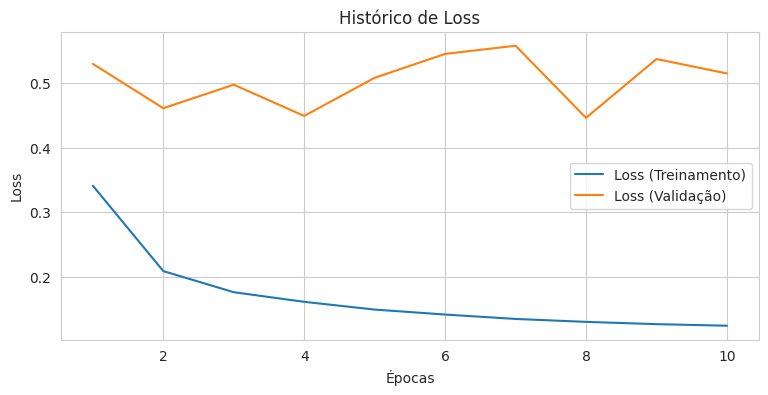

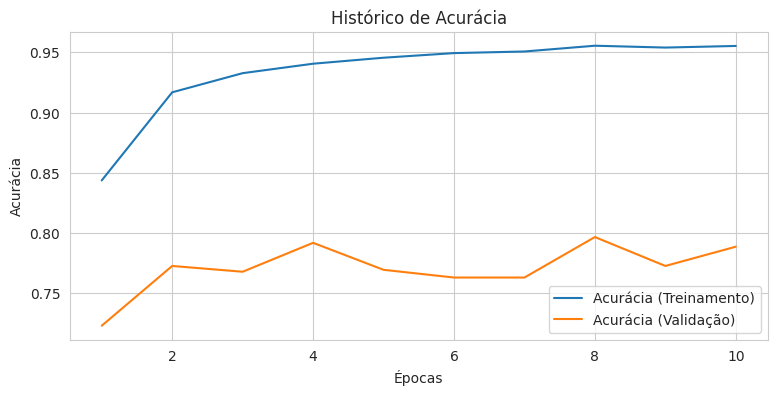

20/20 [==============================] - 16s 781ms/step


Modelo: MobileNetV2
Tempo: 29.0 min
Acurácia: 78.85
Precisão: 75.2
Recall: 98.72
F1-Score: 85.37
Matriz de Confusão:
[[107 127]
 [  5 385]]





In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Carregar o modelo MobileNetV2 pré-treinado
mobilenet_v2_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in mobilenet_v2_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = mobilenet_v2_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

# Crie um novo modelo com a nova camada de saída
model = Model(inputs=mobilenet_v2_model.input, outputs=x)

treinamento(model,10,'MobileNetV2')

#### Xception

Epoch 1/5
163/163 [==============================] - 32s 175ms/step - loss: 1.0446 - accuracy: 0.8478 - val_loss: 1.3280 - val_accuracy: 0.7276
Epoch 2/5
163/163 [==============================] - 28s 168ms/step - loss: 0.2577 - accuracy: 0.9126 - val_loss: 0.9186 - val_accuracy: 0.7708
Epoch 3/5
163/163 [==============================] - 27s 162ms/step - loss: 0.2040 - accuracy: 0.9314 - val_loss: 0.5812 - val_accuracy: 0.8221
Epoch 4/5
163/163 [==============================] - 27s 166ms/step - loss: 0.1985 - accuracy: 0.9316 - val_loss: 0.8535 - val_accuracy: 0.7804
Epoch 5/5
163/163 [==============================] - 26s 162ms/step - loss: 0.2156 - accuracy: 0.9273 - val_loss: 0.5131 - val_accuracy: 0.8253


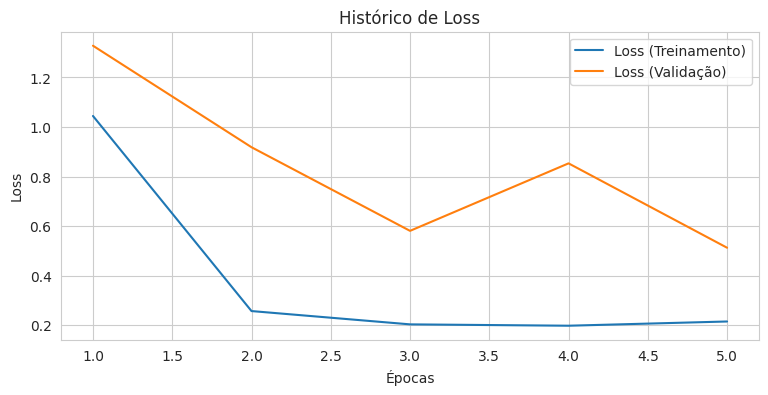

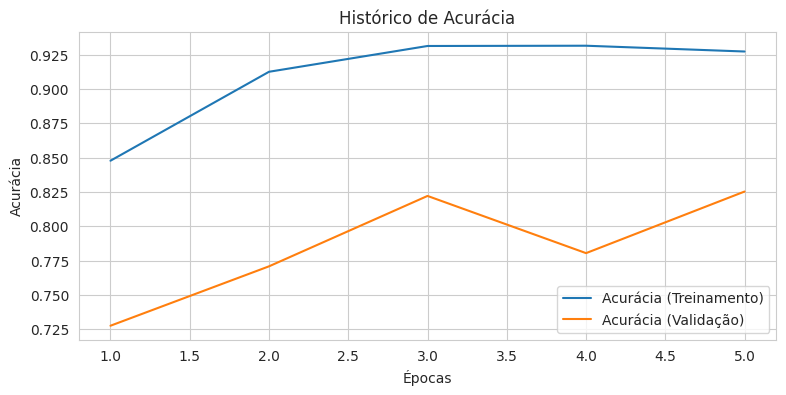

20/20 [==============================] - 3s 142ms/step


Modelo: Xception
Tempo: 3.0 min
Acurácia: 82.53
Precisão: 84.18
Recall: 88.72
F1-Score: 86.39
Matriz de Confusão:
[[169  65]
 [ 44 346]]





In [ ]:
from tensorflow.keras.applications import Xception

# Carregar o modelo Xception pré-treinado
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in xception_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = xception_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

model = Model(inputs=xception_model.input, outputs=x)

treinamento(model, 10, 'Xception')

#### VGG16

58889256/58889256 [==============================] - 2s 0us/step
Epoch 1/5
163/163 [==============================] - 89s 435ms/step - loss: 13.8558 - accuracy: 0.7385 - val_loss: 0.6748 - val_accuracy: 0.6250
Epoch 2/5
163/163 [==============================] - 68s 415ms/step - loss: 0.5596 - accuracy: 0.7429 - val_loss: 1.5796 - val_accuracy: 0.6250
Epoch 3/5
163/163 [==============================] - 68s 415ms/step - loss: 0.4122 - accuracy: 0.7561 - val_loss: 0.4194 - val_accuracy: 0.8141
Epoch 4/5
163/163 [==============================] - 68s 416ms/step - loss: 0.3617 - accuracy: 0.7885 - val_loss: 0.4406 - val_accuracy: 0.8093
Epoch 5/5
163/163 [==============================] - 68s 416ms/step - loss: 0.3360 - accuracy: 0.8466 - val_loss: 0.7541 - val_accuracy: 0.6763


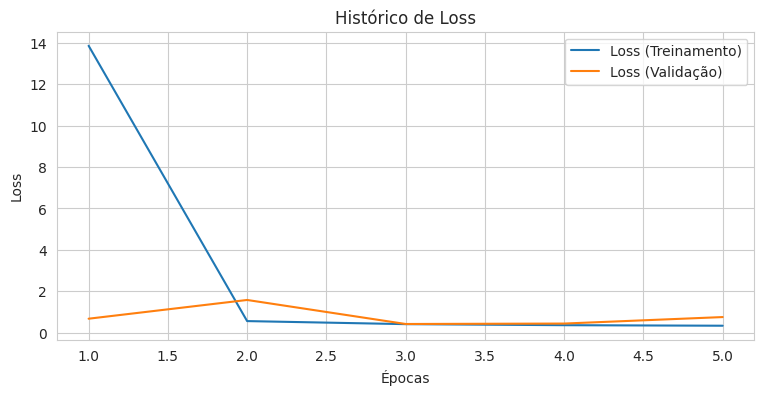

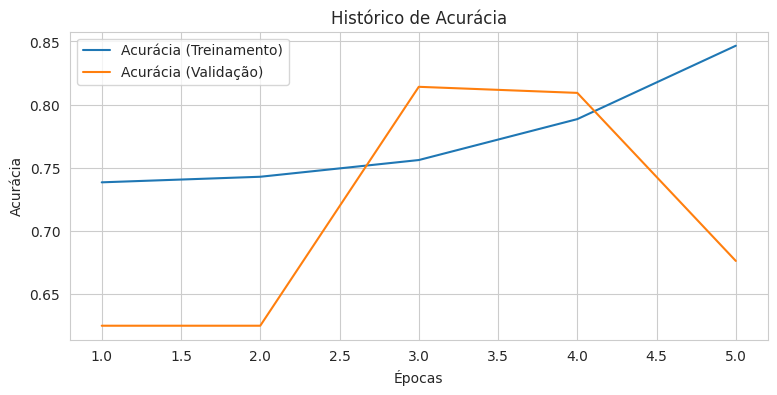

20/20 [==============================] - 3s 122ms/step


Modelo: VGG16
Tempo: 6.0 min
Acurácia: 67.63
Precisão: 67.22
Recall: 94.1
F1-Score: 78.42
Matriz de Confusão:
[[ 55 179]
 [ 23 367]]





In [ ]:
from tensorflow.keras.applications import VGG16

# Carregar o modelo VGG16 pré-treinado
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in vgg16_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

model = Model(inputs=vgg16_model.input, outputs=x)

treinamento(model, 10,'VGG16')

#### ResNet50V2

94668760/94668760 [==============================] - 3s 0us/step
Epoch 1/5
163/163 [==============================] - 87s 310ms/step - loss: 0.1449 - accuracy: 0.9459 - val_loss: 25.3122 - val_accuracy: 0.3894
Epoch 2/5
163/163 [==============================] - 48s 294ms/step - loss: 0.0809 - accuracy: 0.9695 - val_loss: 8.3762 - val_accuracy: 0.6394
Epoch 3/5
163/163 [==============================] - 48s 297ms/step - loss: 0.0703 - accuracy: 0.9726 - val_loss: 0.6592 - val_accuracy: 0.8269
Epoch 4/5
163/163 [==============================] - 48s 295ms/step - loss: 0.0579 - accuracy: 0.9787 - val_loss: 1.7893 - val_accuracy: 0.6635
Epoch 5/5
163/163 [==============================] - 48s 295ms/step - loss: 0.0400 - accuracy: 0.9852 - val_loss: 1.6586 - val_accuracy: 0.7676


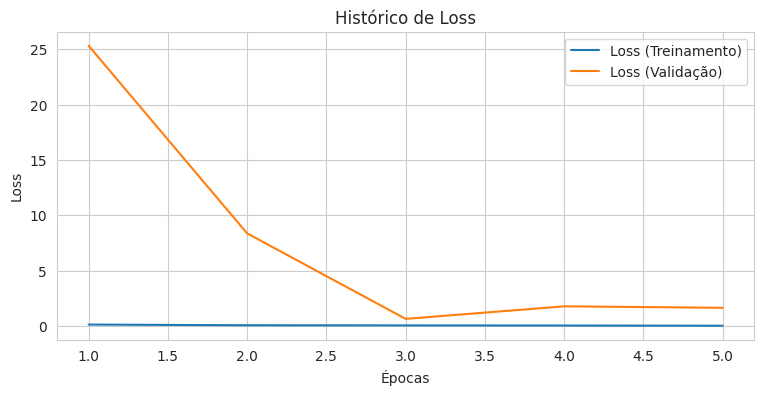

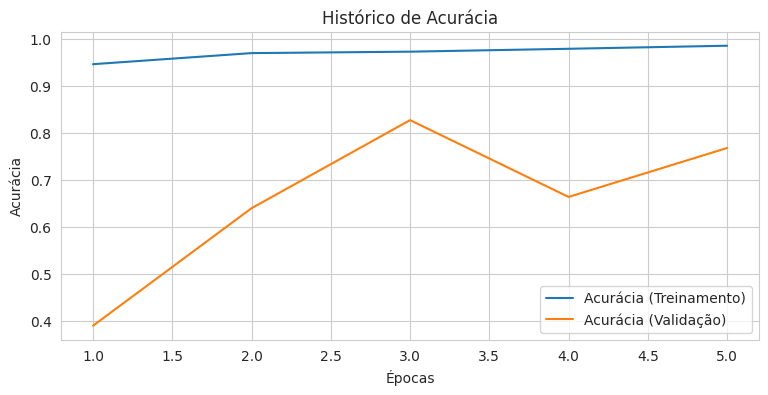

20/20 [==============================] - 3s 87ms/step


Modelo: ResNet50V2
Tempo: 5.0 min
Acurácia: 76.76
Precisão: 72.9
Recall: 100.0
F1-Score: 84.32
Matriz de Confusão:
[[ 89 145]
 [  0 390]]





In [ ]:
from tensorflow.keras.applications import ResNet50V2

# Carregar o modelo ResNet50V2 pré-treinado
ResNet50V2_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in ResNet50V2_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = ResNet50V2_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

# Crie um novo modelo com a nova camada de saída
model = Model(inputs=ResNet50V2_model.input, outputs=x)

treinamento(model, 10,'ResNet50V2')

#### InceptionV3

87910968/87910968 [==============================] - 3s 0us/step
Epoch 1/5
163/163 [==============================] - 91s 276ms/step - loss: 0.1108 - accuracy: 0.9578 - val_loss: 1.4446 - val_accuracy: 0.8766
Epoch 2/5
163/163 [==============================] - 41s 253ms/step - loss: 0.0620 - accuracy: 0.9760 - val_loss: 1.0771 - val_accuracy: 0.8221
Epoch 3/5
163/163 [==============================] - 43s 261ms/step - loss: 0.0479 - accuracy: 0.9816 - val_loss: 1.4272 - val_accuracy: 0.7724
Epoch 4/5
163/163 [==============================] - 42s 256ms/step - loss: 0.0419 - accuracy: 0.9841 - val_loss: 0.6871 - val_accuracy: 0.8638
Epoch 5/5
163/163 [==============================] - 41s 253ms/step - loss: 0.0198 - accuracy: 0.9933 - val_loss: 1.0172 - val_accuracy: 0.7997


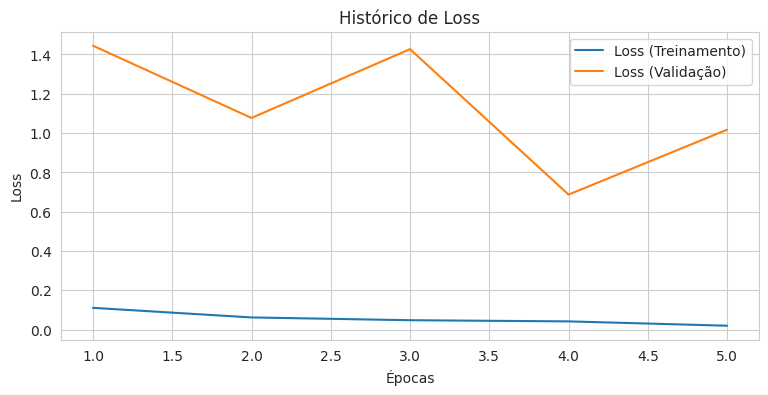

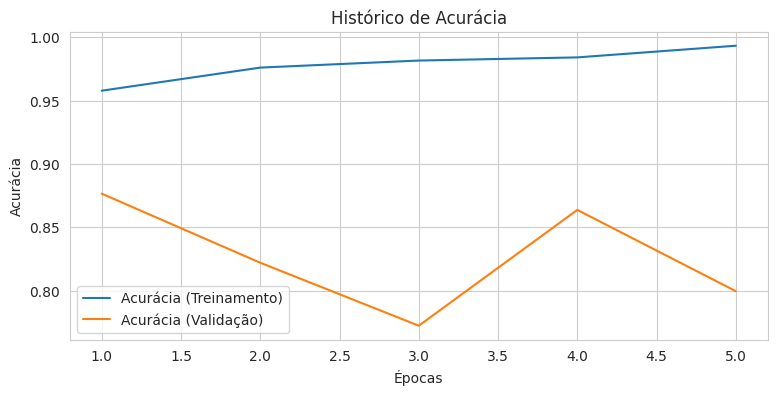

20/20 [==============================] - 3s 79ms/step


Modelo: InceptionV3
Tempo: 6.0 min
Acurácia: 79.97
Precisão: 75.93
Recall: 99.49
F1-Score: 86.13
Matriz de Confusão:
[[111 123]
 [  2 388]]





In [ ]:
from tensorflow.keras.applications import InceptionV3

# Carregar o modelo InceptionV3 pré-treinado
inceptionv3_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in inceptionv3_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = inceptionv3_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

# Crie um novo modelo com a nova camada de saída
model = Model(inputs=inceptionv3_model.input, outputs=x)

treinamento(model, 10,'InceptionV3')

#### DenseNet121

29084464/29084464 [==============================] - 1s 0us/step
Epoch 1/5
163/163 [==============================] - 141s 392ms/step - loss: 0.1232 - accuracy: 0.9469 - val_loss: 3.2234 - val_accuracy: 0.7436
Epoch 2/5
163/163 [==============================] - 61s 370ms/step - loss: 0.0706 - accuracy: 0.9751 - val_loss: 0.7904 - val_accuracy: 0.8381
Epoch 3/5
163/163 [==============================] - 60s 367ms/step - loss: 0.0674 - accuracy: 0.9741 - val_loss: 2.6837 - val_accuracy: 0.7147
Epoch 4/5
163/163 [==============================] - 61s 371ms/step - loss: 0.0497 - accuracy: 0.9824 - val_loss: 0.3944 - val_accuracy: 0.8670
Epoch 5/5
163/163 [==============================] - 60s 366ms/step - loss: 0.0395 - accuracy: 0.9849 - val_loss: 0.7174 - val_accuracy: 0.8029


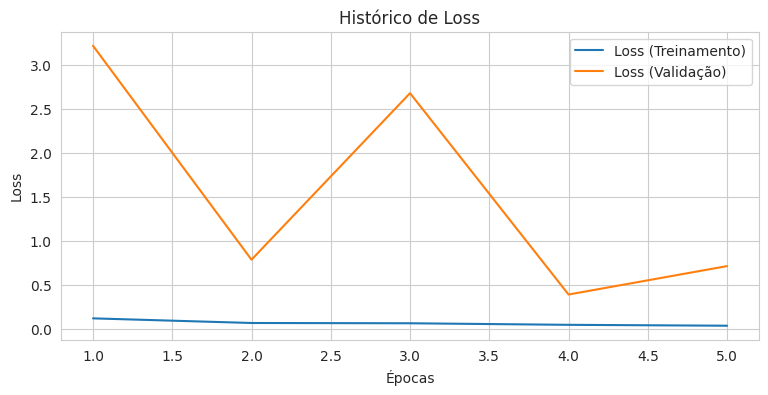

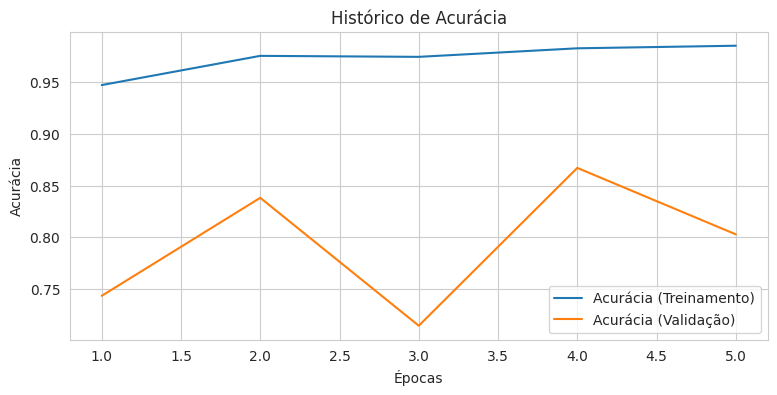

20/20 [==============================] - 4s 95ms/step


Modelo: DenseNet121
Tempo: 7.0 min
Acurácia: 80.29
Precisão: 76.23
Recall: 99.49
F1-Score: 86.32
Matriz de Confusão:
[[113 121]
 [  2 388]]





In [ ]:
from tensorflow.keras.applications import DenseNet121

# Carregar o modelo DenseNet121 pré-treinado
densenet121_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in densenet121_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = densenet121_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

# Crie um novo modelo com a nova camada de saída
model = Model(inputs=densenet121_model.input, outputs=x)

treinamento(model,10,'DenseNet121')

#### EfficientNetB0

16705208/16705208 [==============================] - 1s 0us/step
Epoch 1/5
163/163 [==============================] - 95s 293ms/step - loss: 0.1108 - accuracy: 0.9582 - val_loss: 0.9243 - val_accuracy: 0.7676
Epoch 2/5
163/163 [==============================] - 45s 273ms/step - loss: 0.0456 - accuracy: 0.9837 - val_loss: 0.8871 - val_accuracy: 0.7724
Epoch 3/5
163/163 [==============================] - 45s 276ms/step - loss: 0.0313 - accuracy: 0.9895 - val_loss: 1.0897 - val_accuracy: 0.7901
Epoch 4/5
163/163 [==============================] - 45s 275ms/step - loss: 0.0271 - accuracy: 0.9910 - val_loss: 0.9209 - val_accuracy: 0.8558
Epoch 5/5
163/163 [==============================] - 45s 277ms/step - loss: 0.0161 - accuracy: 0.9939 - val_loss: 1.3129 - val_accuracy: 0.8189


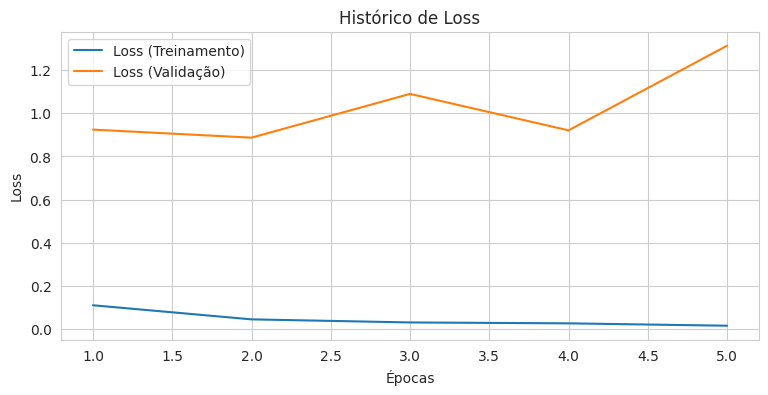

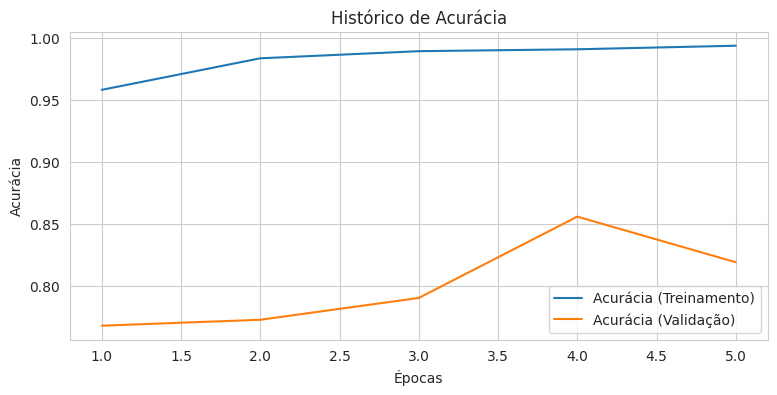

20/20 [==============================] - 3s 59ms/step


Modelo: EfficientNetB0
Tempo: 7.0 min
Acurácia: 81.89
Precisão: 77.64
Recall: 99.74
F1-Score: 87.32
Matriz de Confusão:
[[122 112]
 [  1 389]]





In [ ]:
from tensorflow.keras.applications import EfficientNetB0

# Carregar o modelo EfficientNetB0 pré-treinado
efficientnetb0_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in efficientnetb0_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = efficientnetb0_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

# Crie um novo modelo com a nova camada de saída
model = Model(inputs=efficientnetb0_model.input, outputs=x)

treinamento(model, 10,'EfficientNetB0')

#### DenseNet201

Epoch 1/5
163/163 [==============================] - 47s 212ms/step - loss: 0.3510 - accuracy: 0.8572 - val_loss: 0.5546 - val_accuracy: 0.7163
Epoch 2/5
163/163 [==============================] - 29s 178ms/step - loss: 0.1971 - accuracy: 0.9256 - val_loss: 0.5764 - val_accuracy: 0.7308
Epoch 3/5
163/163 [==============================] - 30s 182ms/step - loss: 0.1574 - accuracy: 0.9463 - val_loss: 0.6257 - val_accuracy: 0.7308
Epoch 4/5
163/163 [==============================] - 29s 180ms/step - loss: 0.1471 - accuracy: 0.9456 - val_loss: 0.7796 - val_accuracy: 0.6907
Epoch 5/5
163/163 [==============================] - 30s 183ms/step - loss: 0.1242 - accuracy: 0.9569 - val_loss: 0.5769 - val_accuracy: 0.7644


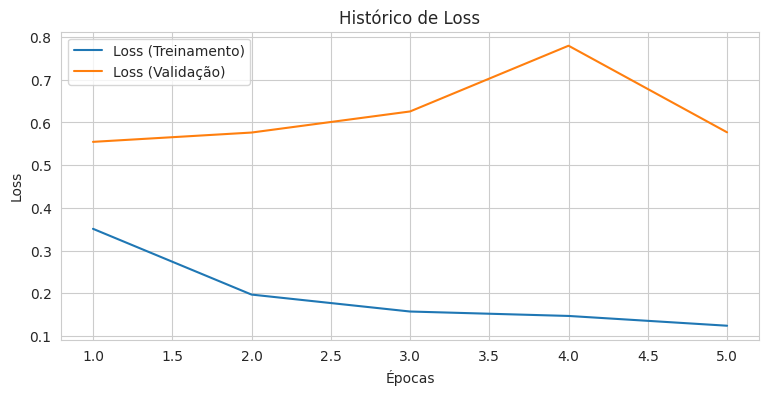

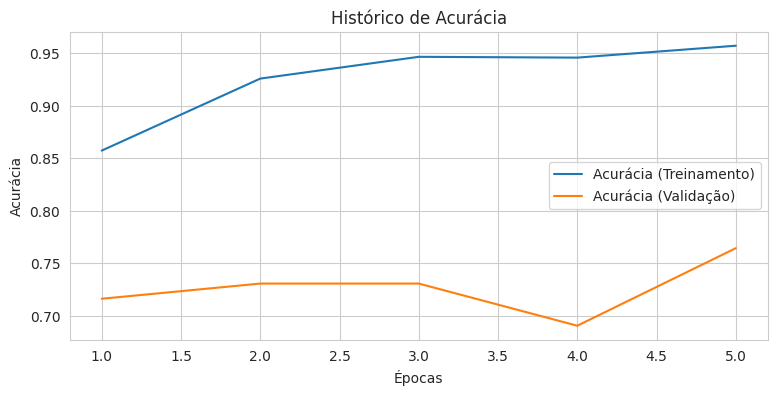

20/20 [==============================] - 7s 147ms/step


Modelo: DenseNet201
Tempo: 3.0 min
Acurácia: 76.44
Precisão: 73.06
Recall: 98.72
F1-Score: 83.97
Matriz de Confusão:
[[ 92 142]
 [  5 385]]





In [ ]:
from tensorflow.keras.applications import DenseNet201

# Carregar o modelo DenseNet121 pré-treinado
DenseNet201_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in DenseNet201_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = DenseNet201_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

# Crie um novo modelo com a nova camada de saída
model = Model(inputs=DenseNet201_model.input, outputs=x)

treinamento(model,10,'DenseNet201')

#### ResNet152V2

234545216/234545216 [==============================] - 8s 0us/step
Epoch 1/5
163/163 [==============================] - 56s 287ms/step - loss: 13.3478 - accuracy: 0.7418 - val_loss: 1.3002 - val_accuracy: 0.8285
Epoch 2/5
163/163 [==============================] - 43s 263ms/step - loss: 1.7860 - accuracy: 0.8252 - val_loss: 1.6261 - val_accuracy: 0.8109
Epoch 3/5
163/163 [==============================] - 43s 264ms/step - loss: 4.4712 - accuracy: 0.7686 - val_loss: 2.8904 - val_accuracy: 0.7901
Epoch 4/5
163/163 [==============================] - 44s 270ms/step - loss: 2.2033 - accuracy: 0.8591 - val_loss: 2.0867 - val_accuracy: 0.8173
Epoch 5/5
163/163 [==============================] - 43s 263ms/step - loss: 3.2595 - accuracy: 0.8351 - val_loss: 1.6609 - val_accuracy: 0.8413


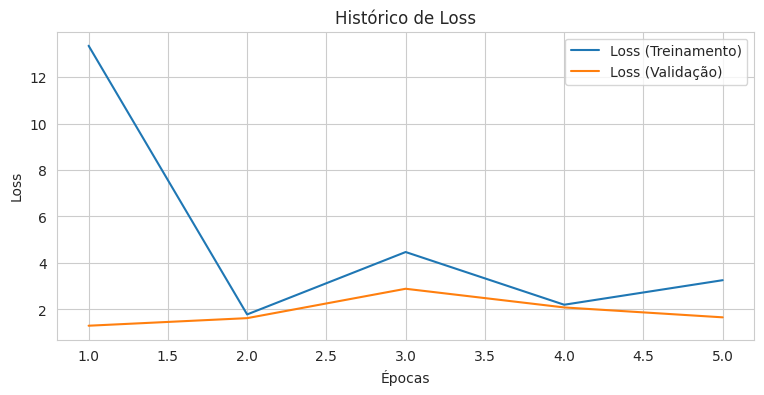

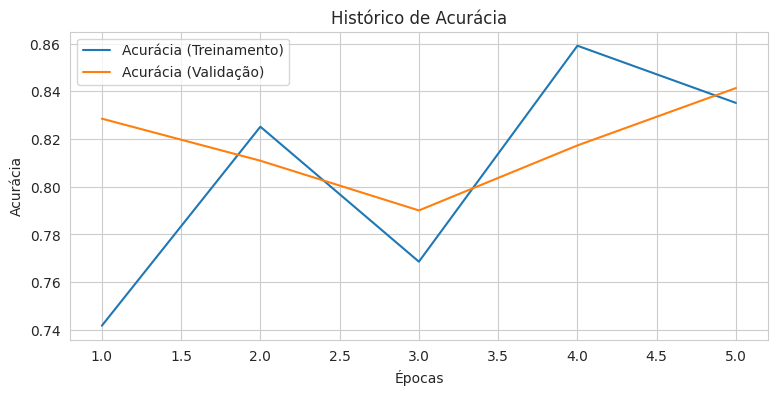

20/20 [==============================] - 7s 226ms/step


Modelo: ResNet152V2
Tempo: 5.0 min
Acurácia: 84.13
Precisão: 85.06
Recall: 90.51
F1-Score: 87.7
Matriz de Confusão:
[[172  62]
 [ 37 353]]





In [ ]:
from tensorflow.keras.applications import ResNet152V2

# Carregar o modelo DenseNet121 pré-treinado
ResNet152V2_model = ResNet152V2 (weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in ResNet152V2_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = ResNet152V2_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

# Crie um novo modelo com a nova camada de saída
model = Model(inputs=ResNet152V2_model.input, outputs=x)

treinamento(model,10,'ResNet152V2')

#### MobileNetV3Large

Epoch 1/10
462/462 [==============================] - 27s 50ms/step - loss: 0.0994 - accuracy: 0.9695 - val_loss: 0.5595 - val_accuracy: 0.7660
Epoch 2/10
462/462 [==============================] - 21s 44ms/step - loss: 0.0481 - accuracy: 0.9825 - val_loss: 0.5445 - val_accuracy: 0.7981
Epoch 3/10
462/462 [==============================] - 22s 47ms/step - loss: 0.0377 - accuracy: 0.9877 - val_loss: 0.6421 - val_accuracy: 0.7853
Epoch 4/10
462/462 [==============================] - 24s 52ms/step - loss: 0.0323 - accuracy: 0.9886 - val_loss: 0.5989 - val_accuracy: 0.7965
Epoch 5/10
462/462 [==============================] - 21s 45ms/step - loss: 0.0282 - accuracy: 0.9900 - val_loss: 0.6968 - val_accuracy: 0.7853
Epoch 6/10
462/462 [==============================] - 21s 46ms/step - loss: 0.0255 - accuracy: 0.9913 - val_loss: 0.5585 - val_accuracy: 0.8157
Epoch 7/10
462/462 [==============================] - 21s 46ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.6072 - val_accuracy:

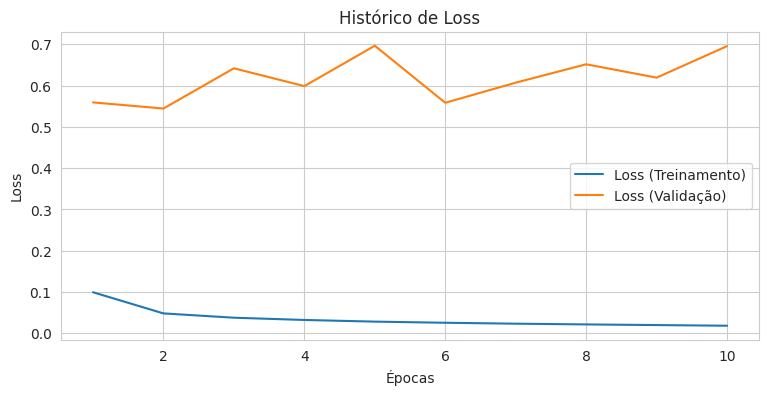

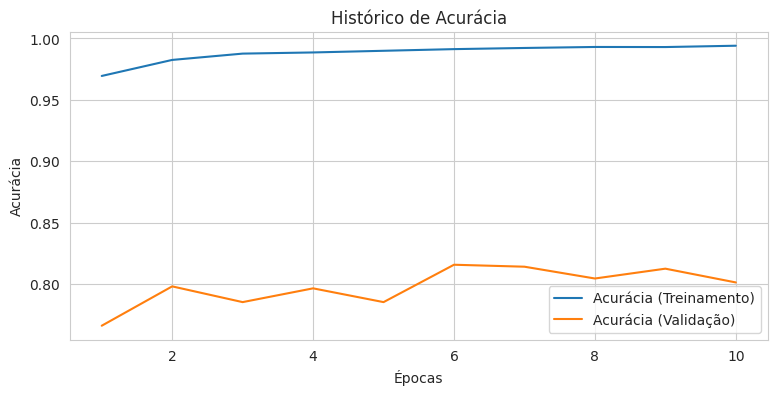

20/20 [==============================] - 2s 40ms/step


Modelo: MobileNetV3Large
Tempo: 5.0 min
Acurácia: 80.13
Precisão: 75.98
Recall: 99.74
F1-Score: 86.25
Matriz de Confusão:
[[111 123]
 [  1 389]]





In [ ]:
from tensorflow.keras.applications import MobileNetV3Large

# Carregar o modelo DenseNet121 pré-treinado
MobileNetV3Large_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in MobileNetV3Large_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = MobileNetV3Large_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

# Crie um novo modelo com a nova camada de saída
model = Model(inputs=MobileNetV3Large_model.input, outputs=x)

treinamento(model,10,'MobileNetV3Large')

#### Gráfico dos Resultados

In [ ]:
metrics

[{'nome': 'MobileNetV2',
  'Accuracy': 77.56,
  'Precision': 74.04,
  'Recall': 98.72,
  'F1 Score': 84.62,
  'Time (minutes)': 1.0},
 {'nome': 'Xception',
  'Accuracy': 84.78,
  'Precision': 80.54,
  'Recall': 99.74,
  'F1 Score': 89.12,
  'Time (minutes)': 9.0},
 {'nome': 'VGG16',
  'Accuracy': 67.63,
  'Precision': 67.22,
  'Recall': 94.1,
  'F1 Score': 78.42,
  'Time (minutes)': 6.0},
 {'nome': 'ResNet50V2',
  'Accuracy': 76.76,
  'Precision': 72.9,
  'Recall': 100.0,
  'F1 Score': 84.32,
  'Time (minutes)': 5.0},
 {'nome': 'InceptionV3',
  'Accuracy': 79.97,
  'Precision': 75.93,
  'Recall': 99.49,
  'F1 Score': 86.13,
  'Time (minutes)': 6.0},
 {'nome': 'DenseNet121',
  'Accuracy': 80.29,
  'Precision': 76.23,
  'Recall': 99.49,
  'F1 Score': 86.32,
  'Time (minutes)': 7.0},
 {'nome': 'EfficientNetB0',
  'Accuracy': 81.89,
  'Precision': 77.64,
  'Recall': 99.74,
  'F1 Score': 87.32,
  'Time (minutes)': 7.0},
 {'nome': 'Xception',
  'Accuracy': 82.53,
  'Precision': 84.18,
  'Rec

In [ ]:
# Construindo dataframe com os dados do teste
import pandas as pd
df = pd.DataFrame(metrics)
# Definir o índice do DataFrame
df = df.set_index("nome")
df

,Accuracy,Precision,Recall,F1 Score,Time (minutes)
nome,,,,,
MobileNetV2,77.56,74.04,98.72,84.62,1.0
Xception,84.78,80.54,99.74,89.12,9.0
VGG16,67.63,67.22,94.10,78.42,6.0
ResNet50V2,76.76,72.90,100.00,84.32,5.0
InceptionV3,79.97,75.93,99.49,86.13,6.0
DenseNet121,80.29,76.23,99.49,86.32,7.0
EfficientNetB0,81.89,77.64,99.74,87.32,7.0
Xception,82.53,84.18,88.72,86.39,3.0
DenseNet201,76.44,73.06,98.72,83.97,3.0


In [ ]:
df.columns

Index(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Time (minutes)'], dtype='object')

In [ ]:
columns=['Accuracy', 'Precision', 'Recall', 'F1 Score']

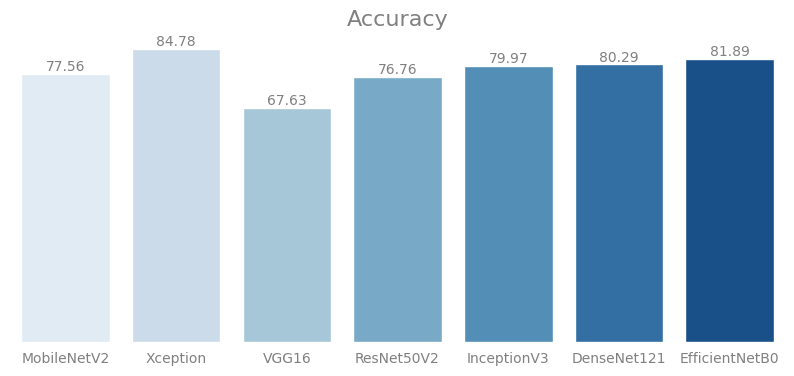

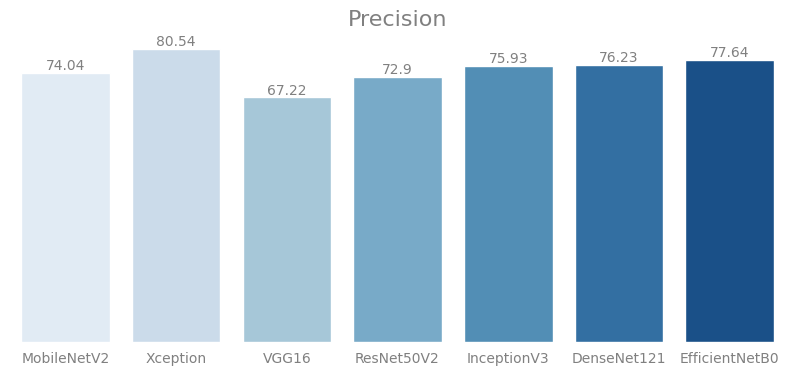

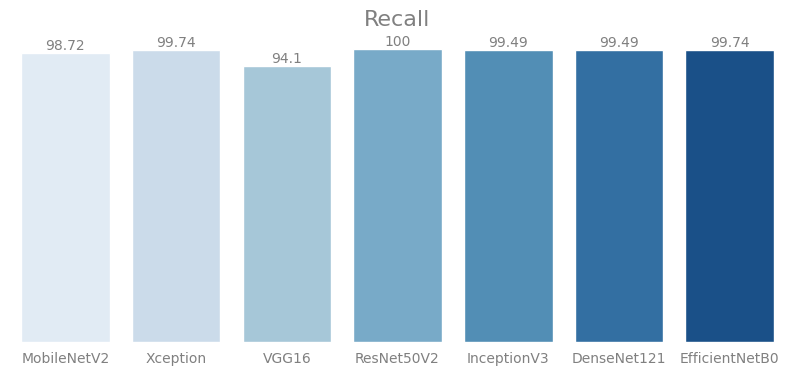

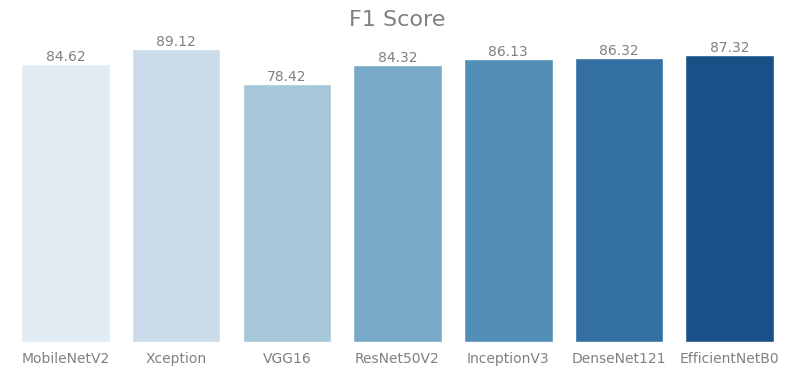

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for results in columns:
  plt.figure(figsize=(10, 4))
  ax= sns.barplot(df, y=results, x=df.index, palette='Blues', )
  ax.set_title(results, size=16, color='gray', loc='center')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.yaxis.set_ticks([])  # Remove os valores do eixo y
  sns.despine(left=True, bottom=True)
  ax.yaxis.set_tick_params(labelsize=10, labelcolor = 'gray')
  ax.xaxis.set_tick_params(labelsize=10, labelcolor = 'gray')
  ax.bar_label(ax.containers[0], color='gray')
  plt.show()

# Parte II

#### Padronização (Z-score)

Padronização (Z-score): A padronização é uma técnica comum para normalização de dados em estatísticas. Isso envolve a subtração da média dos valores de pixel e a divisão pelo desvio padrão. Isso pode ajudar a reduzir ainda mais a variabilidade nos dados.

In [ ]:
import numpy as np
import os
from PIL import Image

# Função para aplicar padronização (Z-score)
def apply_zscore_standardization(img):
    img = np.array(img)
    mean = np.mean(img)
    std = np.std(img)
    standardized_img = (img - mean) / std
    standardized_img = (standardized_img * 255).astype(np.uint8)
    return Image.fromarray(standardized_img)

lista = ['/content/chest_xray/test/NORMAL', '/content/chest_xray/test/PNEUMONIA', '/content/chest_xray/train/NORMAL',
         '/content/chest_xray/train/PNEUMONIA', '/content/chest_xray/val/NORMAL', '/content/chest_xray/val/PNEUMONIA']
destino = ['/content/test_resized/NORMAL', '/content/test_resized/PNEUMONIA', '/content/train_resized/NORMAL',
           '/content/train_resized/PNEUMONIA', '/content/val_resized/NORMAL', '/content/val_resized/PNEUMONIA']

for source_directory, destination_directory in zip(lista, destino):
    # Criação da pasta de destino
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Tamanho desejado
    target_size = (size)

    # Inicialize a contagem de imagens
    num_images = 0

    # Iterar sobre as imagens no diretório de origem
    for filename in os.listdir(source_directory):
        if filename.endswith(".jpeg") or filename.endswith(".png"):
            source_path = os.path.join(source_directory, filename)
            img = Image.open(source_path)

            # Redimensionamento
            resized_img = img.resize(target_size, Image.LANCZOS)

            # Aplicar padronização (Z-score)
            standardized_img = apply_zscore_standardization(resized_img)

            destination_path = os.path.join(destination_directory, filename)
            standardized_img.save(destination_path)

            # Incrementa a contagem de imagens
            num_images += 1

    print(f"Foram processadas {num_images} imagens em {destination_directory}.")

Foram processadas 234 imagens em /content/test_resized/NORMAL.
Foram processadas 390 imagens em /content/test_resized/PNEUMONIA.
Foram processadas 1341 imagens em /content/train_resized/NORMAL.
Foram processadas 3875 imagens em /content/train_resized/PNEUMONIA.
Foram processadas 8 imagens em /content/val_resized/NORMAL.
Foram processadas 8 imagens em /content/val_resized/PNEUMONIA.


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Caminhos para os dados
train_data_dir = '/content/train_resized' # '/content/combined_train'
test_data_dir = '/content/test_resized'

# Configurações para os dados de treinamento e teste
batch_size = 32
image_size = (size)

train_dataset = image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='binary',  #classificação binária
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=123
)

test_dataset = image_dataset_from_directory(
    test_data_dir,
    labels='inferred',
    label_mode='binary',  # classificação binária
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False
)

# Obter o número de classes (deve ser 1 para classificação binária)
num_classes = 1

# Verifique as classes (deve ser uma lista vazia, pois agora é uma classificação binária)
class_names = []
print("Classes:", class_names)
print("Número de Classes:", num_classes)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Classes: []
Número de Classes: 1


83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/20
163/163 [==============================] - 32s 170ms/step - loss: 0.5591 - accuracy: 0.7646 - val_loss: 0.6219 - val_accuracy: 0.7356
Epoch 2/20
163/163 [==============================] - 29s 175ms/step - loss: 0.3213 - accuracy: 0.8564 - val_loss: 0.6111 - val_accuracy: 0.7516
Epoch 3/20
163/163 [==============================] - 26s 157ms/step - loss: 0.2805 - accuracy: 0.8740 - val_loss: 0.6150 - val_accuracy: 0.7500
Epoch 4/20
163/163 [==============================] - 26s 158ms/step - loss: 0.2701 - accuracy: 0.8788 - val_loss: 0.6134 - val_accuracy: 0.7452
Epoch 5/20
163/163 [==============================] - 26s 159ms/step - loss: 0.2531 - accuracy: 0.8871 - val_loss: 0.5890 - val_accuracy: 0.7596
Epoch 6/20
163/163 [==============================] - 26s 157ms/step - loss: 0.2393 - accuracy: 0.8926 - val_loss: 0.7236 - val_accuracy: 0.7196
Epoch 7/20
163/163 [==============================] - 26s 158ms/s

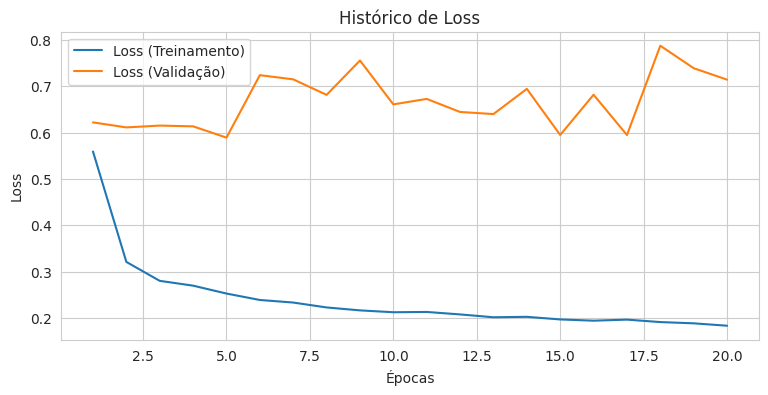

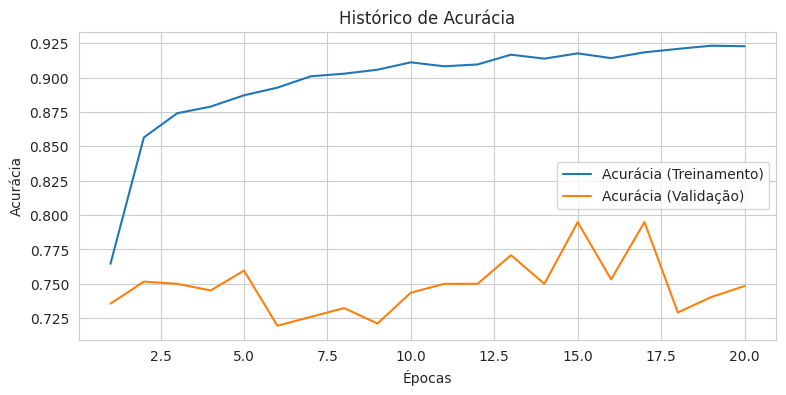

20/20 [==============================] - 3s 136ms/step


Modelo: Xception
Tempo: 9.0 min
Acurácia: 74.84
Precisão: 72.62
Recall: 95.9
F1-Score: 82.65
Matriz de Confusão:
[[ 93 141]
 [ 16 374]]





In [ ]:
from tensorflow.keras.applications import Xception

# Carregar o modelo Xception pré-treinado
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in xception_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = xception_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

# Crie um novo modelo com a nova camada de saída
model = Model(inputs=xception_model.input, outputs=x)

treinamento(model, 10, 'Xception')

12683000/12683000 [==============================] - 0s 0us/step
Epoch 1/10
163/163 [==============================] - 14s 58ms/step - loss: 0.2955 - accuracy: 0.8742 - val_loss: 0.4658 - val_accuracy: 0.7965
Epoch 2/10
163/163 [==============================] - 8s 45ms/step - loss: 0.1729 - accuracy: 0.9344 - val_loss: 0.4448 - val_accuracy: 0.8285
Epoch 3/10
163/163 [==============================] - 9s 53ms/step - loss: 0.1472 - accuracy: 0.9465 - val_loss: 0.4985 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 8s 50ms/step - loss: 0.1292 - accuracy: 0.9538 - val_loss: 0.4392 - val_accuracy: 0.8349
Epoch 5/10
163/163 [==============================] - 8s 50ms/step - loss: 0.1196 - accuracy: 0.9565 - val_loss: 0.4886 - val_accuracy: 0.8269
Epoch 6/10
163/163 [==============================] - 8s 46ms/step - loss: 0.1118 - accuracy: 0.9580 - val_loss: 0.4938 - val_accuracy: 0.8253
Epoch 7/10
163/163 [==============================] - 8s 50ms/step - loss: 0

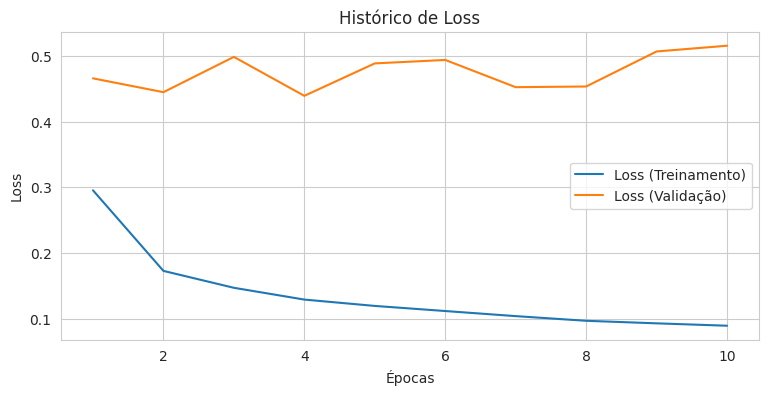

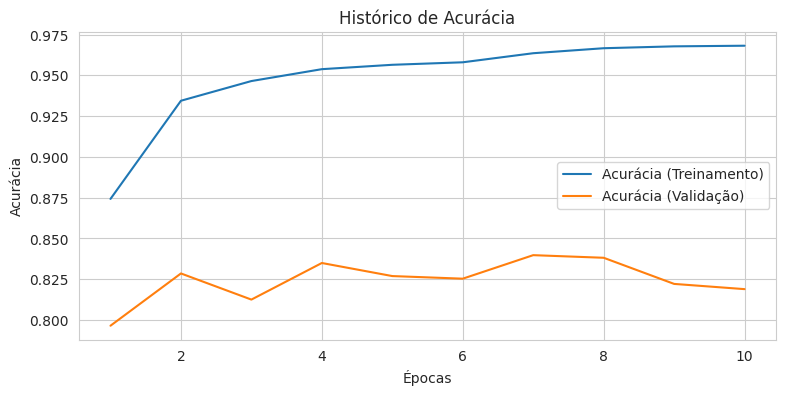

20/20 [==============================] - 2s 39ms/step


Modelo: MobileNetV3Large
Tempo: 2.0 min
Acurácia: 81.89
Precisão: 78.09
Recall: 98.72
F1-Score: 87.2
Matriz de Confusão:
[[126 108]
 [  5 385]]





In [ ]:
from tensorflow.keras.applications import MobileNetV3Large

# Carregar o modelo DenseNet121 pré-treinado
MobileNetV3Large_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in MobileNetV3Large_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = MobileNetV3Large_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

# Crie um novo modelo com a nova camada de saída
model = Model(inputs=MobileNetV3Large_model.input, outputs=x)

treinamento(model,10,'MobileNetV3Large')

# Parte III

### Aumento de contraste usando transformação gama

In [ ]:
# Aumento de contraste
import numpy as np
import os
from PIL import Image

# Função para aplicar aumento de contraste usando transformação gama
def apply_gamma_correction(img, gamma=1.5):
    img = np.array(img)
    img = img / 255.0
    img = np.power(img, gamma)
    img = (img * 255).astype(np.uint8)
    return Image.fromarray(img)

lista = ['/content/chest_xray/test/NORMAL', '/content/chest_xray/test/PNEUMONIA', '/content/chest_xray/train/NORMAL',
         '/content/chest_xray/train/PNEUMONIA', '/content/chest_xray/val/NORMAL', '/content/chest_xray/val/PNEUMONIA']
destino = ['/content/test_resized/NORMAL', '/content/test_resized/PNEUMONIA', '/content/train_resized/NORMAL',
           '/content/train_resized/PNEUMONIA', '/content/val_resized/NORMAL', '/content/val_resized/PNEUMONIA']

for source_directory, destination_directory in zip(lista, destino):
    # Criação da pasta de destino
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Tamanho desejado
    target_size = (size)

    # Inicialize a contagem de imagens
    num_images = 0

    # Iterar sobre as imagens no diretório de origem
    for filename in os.listdir(source_directory):
        if filename.endswith(".jpeg") or filename.endswith(".png"):
            source_path = os.path.join(source_directory, filename)
            img = Image.open(source_path)

            # Redimensionamento
            resized_img = img.resize(target_size, Image.LANCZOS)

            # Aplicar aumento de contraste
            contrast_enhanced_img = apply_gamma_correction(resized_img)

            destination_path = os.path.join(destination_directory, filename)
            contrast_enhanced_img.save(destination_path)

            # Incrementa a contagem de imagens
            num_images += 1

    print(f"Foram processadas {num_images} imagens em {destination_directory}.")

Foram processadas 234 imagens em /content/test_resized/NORMAL.
Foram processadas 390 imagens em /content/test_resized/PNEUMONIA.
Foram processadas 1341 imagens em /content/train_resized/NORMAL.
Foram processadas 3875 imagens em /content/train_resized/PNEUMONIA.
Foram processadas 8 imagens em /content/val_resized/NORMAL.
Foram processadas 8 imagens em /content/val_resized/PNEUMONIA.


In [ ]:
# Aplicando data augmantation para aumentar o número de imagens para 10000 a mais
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
import numpy as np

# Diretórios de origem e destino
source_directories = [
    '/content/train_resized/NORMAL',
    '/content/train_resized/PNEUMONIA'
]
destination_directories = [
    '/content/augmented_train/NORMAL',
    '/content/augmented_train/PNEUMONIA'
]

# Configurações de data augmentation
datagen = ImageDataGenerator(
    rotation_range=7.5,          # Reduzido para 7.5 graus de rotação máximo.
    width_shift_range=0.1,      # Reduzido para 10% da largura da imagem.
    height_shift_range=0.1,     # Reduzido para 10% da altura da imagem.
    shear_range=0.05,           # Reduzido para 5% do ângulo máximo de cisalhamento.
    zoom_range=0.1,             # Reduzido para 10% do fator de zoom máximo.
    horizontal_flip=True,       # Permite espelhamento horizontal das imagens.
    fill_mode='nearest'         # Define como preencher pixels criados durante as transformações.
)

# Número desejado de imagens após data augmentation para ambas as classes
target_num_images = 10000
target_size = (224, 224)
for source_directory, destination_directory in zip(source_directories, destination_directories):
    # Criação da pasta de destino
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Inicialize a contagem de imagens
    num_images = len(os.listdir(source_directory))

    # Iterar sobre as imagens no diretório de origem
    for filename in os.listdir(source_directory):
        source_path = os.path.join(source_directory, filename)
        img = Image.open(source_path)

        # Redimensionamento (se necessário)
        resized_img = img.resize(target_size, Image.LANCZOS)

        # Salvar a imagem original
        destination_path = os.path.join(destination_directory, f"{num_images}.jpeg")
        resized_img.save(destination_path)

        # Aplicar data augmentation manualmente
        for _ in range(target_num_images - num_images):
            augmented_img = resized_img.rotate(np.random.uniform(-15, 15))  # Rotação aleatória entre -15 e 15 graus
            augmented_img = augmented_img.transpose(Image.FLIP_LEFT_RIGHT)  # Espelhamento horizontal aleatório

            destination_path = os.path.join(destination_directory, f"{num_images + 1}.jpeg")
            augmented_img.save(destination_path)

            # Incrementa a contagem de imagens
            num_images += 1
            if num_images >= target_num_images:
                break

    print(f"Foram processadas {num_images} imagens em {destination_directory}.")

In [ ]:
# Juntando as imagens originais com as augmented
import shutil

# Diretórios de origem para os dados originais e aumentados
original_train_directory = '/content/train_resized'
augmented_train_directory = '/content/augmented_train'

# Diretório de destino para o conjunto de treinamento combinado
combined_train_directory = '/content/combined_train'

# Criar uma pasta para o conjunto de treinamento combinado, se ainda não existir
if not os.path.exists(combined_train_directory):
    os.makedirs(combined_train_directory)

# Copiar imagens originais para o diretório combinado
for class_folder in os.listdir(original_train_directory):
    class_path = os.path.join(original_train_directory, class_folder)
    for filename in os.listdir(class_path):
        source_path = os.path.join(class_path, filename)
        destination_path = os.path.join(combined_train_directory, class_folder, filename)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copy(source_path, destination_path)

# Copiar imagens aumentadas para o diretório combinado
for class_folder in os.listdir(augmented_train_directory):
    class_path = os.path.join(augmented_train_directory, class_folder)
    for filename in os.listdir(class_path):
        source_path = os.path.join(class_path, filename)
        destination_path = os.path.join(combined_train_directory, class_folder, filename)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copy(source_path, destination_path)

# Contar o número de imagens em cada diretório combinado
for class_folder in os.listdir(combined_train_directory):
    class_path = os.path.join(combined_train_directory, class_folder)
    num_images = len(os.listdir(class_path))
    print(f"Total de imagens em {class_folder}: {num_images}")

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Caminhos para os dados
train_data_dir = '/content/combined_train'
test_data_dir = '/content/test_resized'

# Configurações para os dados de treinamento e teste
batch_size = 32
image_size = (size)

train_dataset = image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='binary',  #classificação binária
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=123
)

test_dataset = image_dataset_from_directory(
    test_data_dir,
    labels='inferred',
    label_mode='binary',  # classificação binária
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False
)

# Obter o número de classes (deve ser 1 para classificação binária)
num_classes = 1

# Verifique as classes (deve ser uma lista vazia, pois agora é uma classificação binária)
class_names = []
print("Classes:", class_names)
print("Número de Classes:", num_classes)

Epoch 1/10
626/626 [==============================] - 42s 46ms/step - loss: 0.0671 - accuracy: 0.9790 - val_loss: 0.5276 - val_accuracy: 0.7837
Epoch 2/10
626/626 [==============================] - 28s 44ms/step - loss: 0.0287 - accuracy: 0.9901 - val_loss: 0.5295 - val_accuracy: 0.7949
Epoch 3/10
626/626 [==============================] - 27s 43ms/step - loss: 0.0228 - accuracy: 0.9923 - val_loss: 0.4564 - val_accuracy: 0.8333
Epoch 4/10
626/626 [==============================] - 27s 43ms/step - loss: 0.0195 - accuracy: 0.9934 - val_loss: 0.5260 - val_accuracy: 0.8125
Epoch 5/10
626/626 [==============================] - 27s 43ms/step - loss: 0.0175 - accuracy: 0.9940 - val_loss: 0.5156 - val_accuracy: 0.8173
Epoch 6/10
626/626 [==============================] - 27s 43ms/step - loss: 0.0160 - accuracy: 0.9944 - val_loss: 0.5855 - val_accuracy: 0.8045
Epoch 7/10
626/626 [==============================] - 27s 43ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.6298 - val_accuracy:

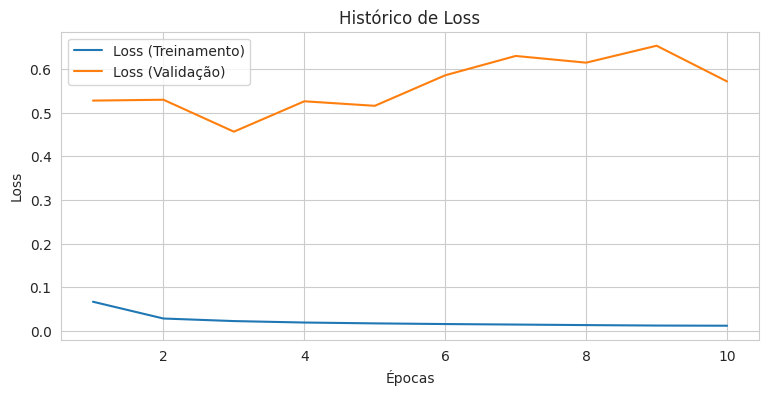

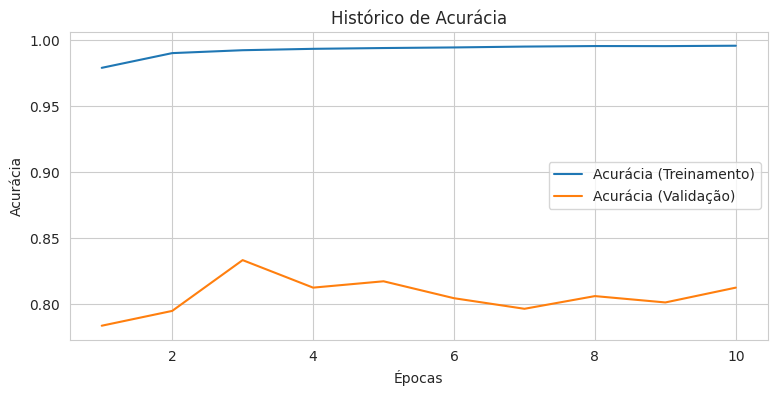

20/20 [==============================] - 4s 43ms/step


Modelo: MobileNetV3Large
Tempo: 5.0 min
Acurácia: 81.25
Precisão: 77.35
Recall: 98.97
F1-Score: 86.84
Matriz de Confusão:
[[121 113]
 [  4 386]]





In [ ]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
# Carregar o modelo DenseNet121 pré-treinado
MobileNetV3Large_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in MobileNetV3Large_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = MobileNetV3Large_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

# Crie um novo modelo com a nova camada de saída
model = Model(inputs=MobileNetV3Large_model.input, outputs=x)

treinamento(model,10,'MobileNetV3Large')

83683744/83683744 [==============================] - 0s 0us/step
Epoch 1/10
626/626 [==============================] - 101s 153ms/step - loss: 0.1248 - accuracy: 0.9632 - val_loss: 1.0232 - val_accuracy: 0.7692
Epoch 2/10
626/626 [==============================] - 90s 143ms/step - loss: 0.0618 - accuracy: 0.9798 - val_loss: 0.6338 - val_accuracy: 0.8205
Epoch 3/10
626/626 [==============================] - 92s 147ms/step - loss: 0.0601 - accuracy: 0.9815 - val_loss: 0.8113 - val_accuracy: 0.7917
Epoch 4/10
626/626 [==============================] - 89s 142ms/step - loss: 0.0539 - accuracy: 0.9838 - val_loss: 0.4612 - val_accuracy: 0.8285
Epoch 5/10
626/626 [==============================] - 91s 146ms/step - loss: 0.0563 - accuracy: 0.9830 - val_loss: 1.0259 - val_accuracy: 0.7115
Epoch 6/10
626/626 [==============================] - 89s 143ms/step - loss: 0.0596 - accuracy: 0.9832 - val_loss: 1.2048 - val_accuracy: 0.7644
Epoch 7/10
626/626 [==============================] - 89s 142ms/

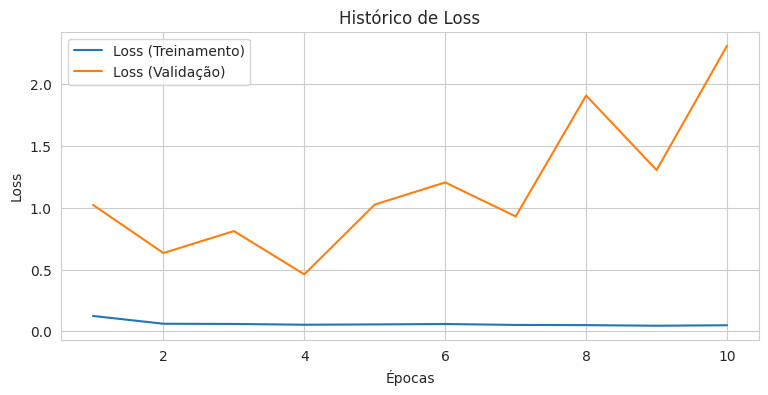

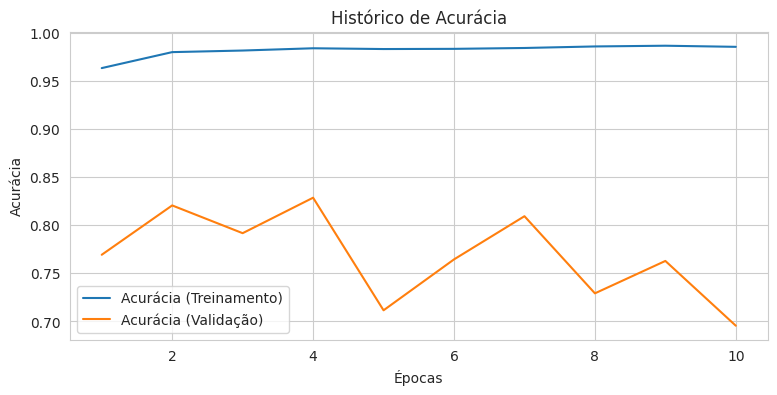

20/20 [==============================] - 3s 129ms/step


Modelo: Xception
Tempo: 17.0 min
Acurácia: 69.55
Precisão: 67.3
Recall: 99.74
F1-Score: 80.37
Matriz de Confusão:
[[ 45 189]
 [  1 389]]





In [ ]:
from tensorflow.keras.applications import Xception

# Carregar o modelo Xception pré-treinado
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in xception_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = xception_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

# Crie um novo modelo com a nova camada de saída
model = Model(inputs=xception_model.input, outputs=x)

treinamento(model, 10, 'Xception')

# Parte IV

### Batch Normalization
Utilizada em redes neurais profundas para melhorar o treinamento e a performance do modelo

In [ ]:
import numpy as np
import os
from PIL import Image

# Definindo listas de diretórios
lista=['/content/chest_xray/test/NORMAL', '/content/chest_xray/test/PNEUMONIA','/content/chest_xray/train/NORMAL','/content/chest_xray/train/PNEUMONIA','/content/chest_xray/val/NORMAL','/content/chest_xray/val/PNEUMONIA']
destino=['/content/test_resized/NORMAL','/content/test_resized/PNEUMONIA','/content/train_resized/NORMAL','/content/train_resized/PNEUMONIA','/content/val_resized/NORMAL','/content/val_resized/PNEUMONIA']

for source_directory, destination_directory in zip(lista, destino):
    # Criação da pasta de destino
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Tamanho desejado
    target_size = (size)

    # Inicialize a contagem de imagens
    num_images = 0

    # Iterar sobre as imagens no diretório de origem
    for filename in os.listdir(source_directory):
        if filename.endswith(".jpeg") or filename.endswith(".png"):
            source_path = os.path.join(source_directory, filename)
            img = Image.open(source_path)

            # Redimensionamento
            resized_img = img.resize(target_size, Image.LANCZOS)

            # Batch Normalization
            normalized_img = resized_img.convert("RGB")
            normalized_img = np.array(normalized_img) / 255.0  # Convertendo para array NumPy e normalizando
            mean = np.mean(normalized_img, axis=(0,1), keepdims=True)
            std = np.std(normalized_img, axis=(0,1), keepdims=True)
            normalized_img = (normalized_img - mean) / (std + 1e-7)

            destination_path = os.path.join(destination_directory, filename)
            normalized_img = Image.fromarray((normalized_img * 255).astype(np.uint8))  # Convertendo de volta para imagem PIL
            normalized_img.save(destination_path)

            # Incrementa a contagem de imagens
            num_images += 1

    print(f"Foram processadas {num_images} imagens em {destination_directory}.")

Foram processadas 234 imagens em /content/test_resized/NORMAL.
Foram processadas 390 imagens em /content/test_resized/PNEUMONIA.
Foram processadas 1341 imagens em /content/train_resized/NORMAL.
Foram processadas 3875 imagens em /content/train_resized/PNEUMONIA.
Foram processadas 8 imagens em /content/val_resized/NORMAL.
Foram processadas 8 imagens em /content/val_resized/PNEUMONIA.


In [ ]:
# Aplicando data augmantation para aumentar o número de imagens para 10000 a mais
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
import numpy as np

# Diretórios de origem e destino
source_directories = [
    '/content/train_resized/NORMAL',
    '/content/train_resized/PNEUMONIA'
]
destination_directories = [
    '/content/augmented_train/NORMAL',
    '/content/augmented_train/PNEUMONIA'
]

# Configurações de data augmentation
datagen = ImageDataGenerator(
    rotation_range=7.5,          # Reduzido para 7.5 graus de rotação máximo.
    width_shift_range=0.1,      # Reduzido para 10% da largura da imagem.
    height_shift_range=0.1,     # Reduzido para 10% da altura da imagem.
    shear_range=0.05,           # Reduzido para 5% do ângulo máximo de cisalhamento.
    zoom_range=0.1,             # Reduzido para 10% do fator de zoom máximo.
    horizontal_flip=True,       # Permite espelhamento horizontal das imagens.
    fill_mode='nearest'         # Define como preencher pixels criados durante as transformações.
)

# Número desejado de imagens após data augmentation para ambas as classes
target_num_images = 10000
target_size = (224, 224)
for source_directory, destination_directory in zip(source_directories, destination_directories):
    # Criação da pasta de destino
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Inicialize a contagem de imagens
    num_images = len(os.listdir(source_directory))

    # Iterar sobre as imagens no diretório de origem
    for filename in os.listdir(source_directory):
        source_path = os.path.join(source_directory, filename)
        img = Image.open(source_path)

        # Redimensionamento (se necessário)
        resized_img = img.resize(target_size, Image.LANCZOS)

        # Salvar a imagem original
        destination_path = os.path.join(destination_directory, f"{num_images}.jpeg")
        resized_img.save(destination_path)

        # Aplicar data augmentation manualmente
        for _ in range(target_num_images - num_images):
            augmented_img = resized_img.rotate(np.random.uniform(-15, 15))  # Rotação aleatória entre -15 e 15 graus
            augmented_img = augmented_img.transpose(Image.FLIP_LEFT_RIGHT)  # Espelhamento horizontal aleatório

            destination_path = os.path.join(destination_directory, f"{num_images + 1}.jpeg")
            augmented_img.save(destination_path)

            # Incrementa a contagem de imagens
            num_images += 1
            if num_images >= target_num_images:
                break

    print(f"Foram processadas {num_images} imagens em {destination_directory}.")

Foram processadas 10000 imagens em /content/augmented_train/NORMAL.
Foram processadas 10000 imagens em /content/augmented_train/PNEUMONIA.


In [ ]:
# Juntando as imagens originais com as augmented
import shutil

# Diretórios de origem para os dados originais e aumentados
original_train_directory = '/content/train_resized'
augmented_train_directory = '/content/augmented_train'

# Diretório de destino para o conjunto de treinamento combinado
combined_train_directory = '/content/combined_train'

# Criar uma pasta para o conjunto de treinamento combinado, se ainda não existir
if not os.path.exists(combined_train_directory):
    os.makedirs(combined_train_directory)

# Copiar imagens originais para o diretório combinado
for class_folder in os.listdir(original_train_directory):
    class_path = os.path.join(original_train_directory, class_folder)
    for filename in os.listdir(class_path):
        source_path = os.path.join(class_path, filename)
        destination_path = os.path.join(combined_train_directory, class_folder, filename)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copy(source_path, destination_path)

# Copiar imagens aumentadas para o diretório combinado
for class_folder in os.listdir(augmented_train_directory):
    class_path = os.path.join(augmented_train_directory, class_folder)
    for filename in os.listdir(class_path):
        source_path = os.path.join(class_path, filename)
        destination_path = os.path.join(combined_train_directory, class_folder, filename)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copy(source_path, destination_path)

# Contar o número de imagens em cada diretório combinado
for class_folder in os.listdir(combined_train_directory):
    class_path = os.path.join(combined_train_directory, class_folder)
    num_images = len(os.listdir(class_path))
    print(f"Total de imagens em {class_folder}: {num_images}")

Total de imagens em NORMAL: 10001
Total de imagens em PNEUMONIA: 10001


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Caminhos para os dados
train_data_dir = '/content/combined_train'
test_data_dir = '/content/test_resized'

# Configurações para os dados de treinamento e teste
batch_size = 32
image_size = (size)

train_dataset = image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='binary',  #classificação binária
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=123
)

test_dataset = image_dataset_from_directory(
    test_data_dir,
    labels='inferred',
    label_mode='binary',  # classificação binária
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False
)

# Obter o número de classes (deve ser 1 para classificação binária)
num_classes = 1

# Verifique as classes (deve ser uma lista vazia, pois agora é uma classificação binária)
class_names = []
print("Classes:", class_names)
print("Número de Classes:", num_classes)

Found 20002 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Classes: []
Número de Classes: 1


12683000/12683000 [==============================] - 0s 0us/step
Epoch 1/10
626/626 [==============================] - 44s 50ms/step - loss: 0.1022 - accuracy: 0.9608 - val_loss: 0.4466 - val_accuracy: 0.8125
Epoch 2/10
626/626 [==============================] - 28s 45ms/step - loss: 0.0439 - accuracy: 0.9836 - val_loss: 0.4330 - val_accuracy: 0.8221
Epoch 3/10
626/626 [==============================] - 28s 44ms/step - loss: 0.0358 - accuracy: 0.9870 - val_loss: 0.3998 - val_accuracy: 0.8253
Epoch 4/10
626/626 [==============================] - 28s 44ms/step - loss: 0.0311 - accuracy: 0.9887 - val_loss: 0.5002 - val_accuracy: 0.8157
Epoch 5/10
626/626 [==============================] - 29s 45ms/step - loss: 0.0274 - accuracy: 0.9901 - val_loss: 0.4294 - val_accuracy: 0.8333
Epoch 6/10
626/626 [==============================] - 28s 44ms/step - loss: 0.0254 - accuracy: 0.9910 - val_loss: 0.4899 - val_accuracy: 0.8157
Epoch 7/10
626/626 [==============================] - 28s 44ms/step - l

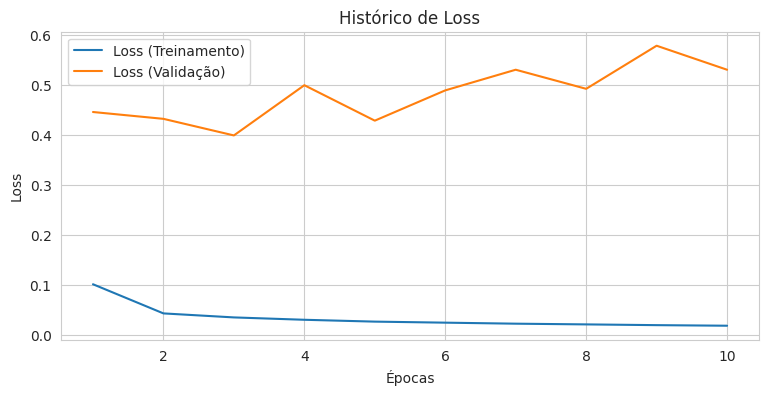

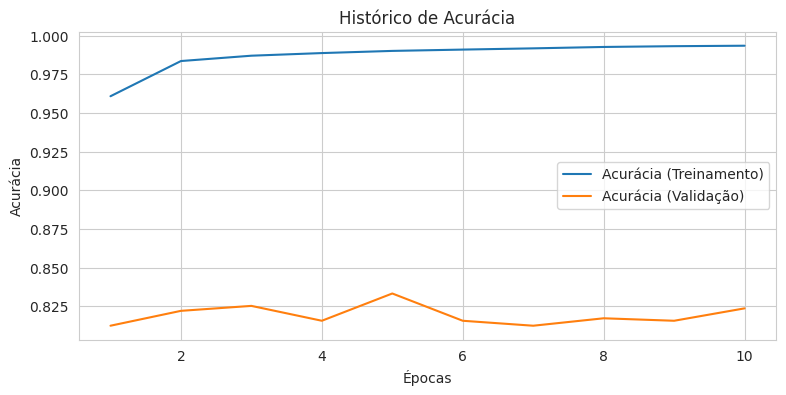

20/20 [==============================] - 2s 58ms/step


Modelo: MobileNetV3Large
Tempo: 6.0 min
Acurácia: 82.37
Precisão: 79.05
Recall: 97.69
F1-Score: 87.39
Matriz de Confusão:
[[133 101]
 [  9 381]]





In [ ]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
# Carregar o modelo DenseNet121 pré-treinado
MobileNetV3Large_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in MobileNetV3Large_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = MobileNetV3Large_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

# Crie um novo modelo com a nova camada de saída
model = Model(inputs=MobileNetV3Large_model.input, outputs=x)

treinamento(model,10,'MobileNetV3Large')

83683744/83683744 [==============================] - 0s 0us/step
Epoch 1/10
626/626 [==============================] - 92s 140ms/step - loss: 0.1321 - accuracy: 0.9464 - val_loss: 0.7983 - val_accuracy: 0.7099
Epoch 2/10
626/626 [==============================] - 86s 137ms/step - loss: 0.0855 - accuracy: 0.9648 - val_loss: 0.6198 - val_accuracy: 0.7740
Epoch 3/10
626/626 [==============================] - 86s 137ms/step - loss: 0.0753 - accuracy: 0.9696 - val_loss: 0.7096 - val_accuracy: 0.7564
Epoch 4/10
626/626 [==============================] - 86s 136ms/step - loss: 0.0703 - accuracy: 0.9715 - val_loss: 0.5680 - val_accuracy: 0.7917
Epoch 5/10
626/626 [==============================] - 86s 137ms/step - loss: 0.0678 - accuracy: 0.9722 - val_loss: 0.5850 - val_accuracy: 0.7612
Epoch 6/10
626/626 [==============================] - 86s 137ms/step - loss: 0.0651 - accuracy: 0.9734 - val_loss: 0.6552 - val_accuracy: 0.7772
Epoch 7/10
626/626 [==============================] - 86s 136ms/s

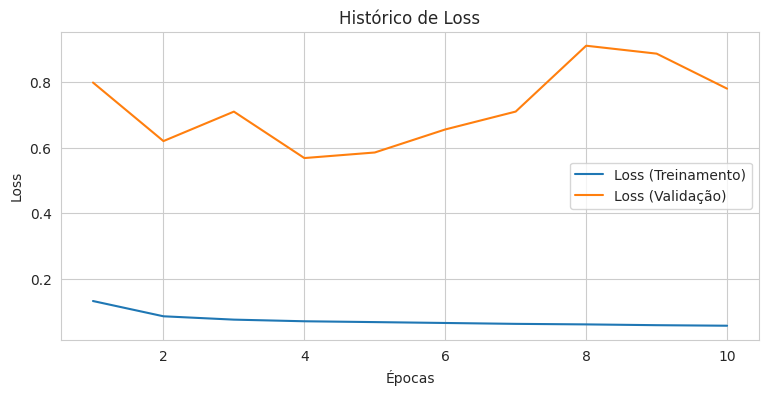

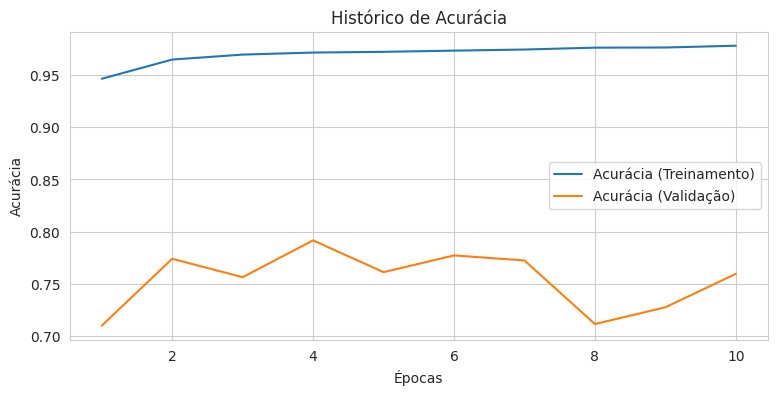

20/20 [==============================] - 3s 126ms/step


Modelo: Xception
Tempo: 16.0 min
Acurácia: 75.96
Precisão: 74.39
Recall: 93.85
F1-Score: 82.99
Matriz de Confusão:
[[108 126]
 [ 24 366]]





In [ ]:
from tensorflow.keras.applications import Xception

# Carregar o modelo Xception pré-treinado
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in xception_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = xception_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

# Crie um novo modelo com a nova camada de saída
model = Model(inputs=xception_model.input, outputs=x)

treinamento(model, 10, 'Xception')

# Parte V

### Layer Normalization (normalização por camada)
É uma técnica de normalização utilizada em redes neurais para melhorar o treinamento e a estabilidade do modelo. Assim como a Batch Normalization, a Layer Normalization busca regularizar e estabilizar os valores das ativações em uma rede neural.

A diferença principal entre a Layer Normalization e a Batch Normalization está no escopo da normalização:

Batch Normalization normaliza as ativações de um mini-batch (um conjunto de exemplos de treinamento) em cada camada da rede neural. Isso significa que as estatísticas de normalização (média e desvio padrão) são calculadas para cada mini-batch.

Layer Normalization, por outro lado, normaliza as ativações de uma camada para todos os exemplos de treinamento em um único passo. Portanto, as estatísticas de normalização são calculadas para cada neurônio em uma camada para todos os exemplos de treinamento.

In [6]:
import numpy as np
import os
from PIL import Image

# Definindo listas de diretórios
lista=['/content/chest_xray/test/NORMAL', '/content/chest_xray/test/PNEUMONIA','/content/chest_xray/train/NORMAL','/content/chest_xray/train/PNEUMONIA','/content/chest_xray/val/NORMAL','/content/chest_xray/val/PNEUMONIA']
destino=['/content/test_resized/NORMAL','/content/test_resized/PNEUMONIA','/content/train_resized/NORMAL','/content/train_resized/PNEUMONIA','/content/val_resized/NORMAL','/content/val_resized/PNEUMONIA']

for source_directory, destination_directory in zip(lista, destino):
    # Criação da pasta de destino
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Tamanho desejado
    target_size = (size)

    # Inicialize a contagem de imagens
    num_images = 0

    # Iterar sobre as imagens no diretório de origem
    for filename in os.listdir(source_directory):
        if filename.endswith(".jpeg") or filename.endswith(".png"):
            source_path = os.path.join(source_directory, filename)
            img = Image.open(source_path)

            # Redimensionamento
            resized_img = img.resize(target_size, Image.LANCZOS)

            # Layer Normalization
            normalized_img = resized_img.convert("RGB")
            normalized_img = np.array(normalized_img) / 255.0  # Convertendo para array NumPy e normalizando
            mean = np.mean(normalized_img)
            std = np.std(normalized_img)
            normalized_img = (normalized_img - mean) / (std + 1e-7)

            destination_path = os.path.join(destination_directory, filename)
            normalized_img = Image.fromarray((normalized_img * 255).astype(np.uint8))  # Convertendo de volta para imagem PIL
            normalized_img.save(destination_path)

            # Incrementa a contagem de imagens
            num_images += 1

    print(f"Foram processadas {num_images} imagens em {destination_directory}.")


Foram processadas 234 imagens em /content/test_resized/NORMAL.
Foram processadas 390 imagens em /content/test_resized/PNEUMONIA.
Foram processadas 1341 imagens em /content/train_resized/NORMAL.
Foram processadas 3875 imagens em /content/train_resized/PNEUMONIA.
Foram processadas 8 imagens em /content/val_resized/NORMAL.
Foram processadas 8 imagens em /content/val_resized/PNEUMONIA.


In [7]:
# Aplicando data augmantation para aumentar o número de imagens para 10000
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
import numpy as np

# Diretórios de origem e destino
source_directories = [
    '/content/train_resized/NORMAL',
    '/content/train_resized/PNEUMONIA'
]
destination_directories = [
    '/content/augmented_train/NORMAL',
    '/content/augmented_train/PNEUMONIA'
]

# Configurações de data augmentation
datagen = ImageDataGenerator(
    rotation_range=7.5,          # Reduzido para 7.5 graus de rotação máximo.
    width_shift_range=0.1,      # Reduzido para 10% da largura da imagem.
    height_shift_range=0.1,     # Reduzido para 10% da altura da imagem.
    shear_range=0.05,           # Reduzido para 5% do ângulo máximo de cisalhamento.
    zoom_range=0.1,             # Reduzido para 10% do fator de zoom máximo.
    horizontal_flip=True,       # Permite espelhamento horizontal das imagens.
    fill_mode='nearest'         # Define como preencher pixels criados durante as transformações.
)

# Número desejado de imagens após data augmentation para ambas as classes
target_num_images = 10000
target_size = (224, 224)
for source_directory, destination_directory in zip(source_directories, destination_directories):
    # Criação da pasta de destino
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Inicialize a contagem de imagens
    num_images = len(os.listdir(source_directory))

    # Iterar sobre as imagens no diretório de origem
    for filename in os.listdir(source_directory):
        source_path = os.path.join(source_directory, filename)
        img = Image.open(source_path)

        # Redimensionamento (se necessário)
        resized_img = img.resize(target_size, Image.LANCZOS)

        # Salvar a imagem original
        destination_path = os.path.join(destination_directory, f"{num_images}.jpeg")
        resized_img.save(destination_path)

        # Aplicar data augmentation manualmente
        for _ in range(target_num_images - num_images):
            augmented_img = resized_img.rotate(np.random.uniform(-15, 15))  # Rotação aleatória entre -15 e 15 graus
            augmented_img = augmented_img.transpose(Image.FLIP_LEFT_RIGHT)  # Espelhamento horizontal aleatório

            destination_path = os.path.join(destination_directory, f"{num_images + 1}.jpeg")
            augmented_img.save(destination_path)

            # Incrementa a contagem de imagens
            num_images += 1
            if num_images >= target_num_images:
                break

    print(f"Foram processadas {num_images} imagens em {destination_directory}.")

Foram processadas 10000 imagens em /content/augmented_train/NORMAL.
Foram processadas 10000 imagens em /content/augmented_train/PNEUMONIA.


In [8]:
# Juntando as imagens originais com as augmented
import shutil

# Diretórios de origem para os dados originais e aumentados
original_train_directory = '/content/train_resized'
augmented_train_directory = '/content/augmented_train'

# Diretório de destino para o conjunto de treinamento combinado
combined_train_directory = '/content/combined_train'

# Criar uma pasta para o conjunto de treinamento combinado, se ainda não existir
if not os.path.exists(combined_train_directory):
    os.makedirs(combined_train_directory)

# Copiar imagens originais para o diretório combinado
for class_folder in os.listdir(original_train_directory):
    class_path = os.path.join(original_train_directory, class_folder)
    for filename in os.listdir(class_path):
        source_path = os.path.join(class_path, filename)
        destination_path = os.path.join(combined_train_directory, class_folder, filename)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copy(source_path, destination_path)

# Copiar imagens aumentadas para o diretório combinado
for class_folder in os.listdir(augmented_train_directory):
    class_path = os.path.join(augmented_train_directory, class_folder)
    for filename in os.listdir(class_path):
        source_path = os.path.join(class_path, filename)
        destination_path = os.path.join(combined_train_directory, class_folder, filename)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copy(source_path, destination_path)

# Contar o número de imagens em cada diretório combinado
for class_folder in os.listdir(combined_train_directory):
    class_path = os.path.join(combined_train_directory, class_folder)
    num_images = len(os.listdir(class_path))
    print(f"Total de imagens em {class_folder}: {num_images}")

Total de imagens em PNEUMONIA: 10001
Total de imagens em NORMAL: 10001


In [9]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Caminhos para os dados
train_data_dir = '/content/combined_train'
test_data_dir = '/content/test_resized'

# Configurações para os dados de treinamento e teste
batch_size = 32
image_size = (size)

train_dataset = image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='binary',  #classificação binária
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=123
)

test_dataset = image_dataset_from_directory(
    test_data_dir,
    labels='inferred',
    label_mode='binary',  # classificação binária
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False
)

# Obter o número de classes (deve ser 1 para classificação binária)
num_classes = 1

# Verifique as classes (deve ser uma lista vazia, pois agora é uma classificação binária)
class_names = []
print("Classes:", class_names)
print("Número de Classes:", num_classes)

Found 20002 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Classes: []
Número de Classes: 1


Epoch 1/10
626/626 [==============================] - 33s 45ms/step - loss: 0.0958 - accuracy: 0.9643 - val_loss: 0.4218 - val_accuracy: 0.8285
Epoch 2/10
626/626 [==============================] - 28s 44ms/step - loss: 0.0442 - accuracy: 0.9844 - val_loss: 0.4067 - val_accuracy: 0.8397
Epoch 3/10
626/626 [==============================] - 28s 44ms/step - loss: 0.0358 - accuracy: 0.9871 - val_loss: 0.3881 - val_accuracy: 0.8542
Epoch 4/10
626/626 [==============================] - 28s 44ms/step - loss: 0.0310 - accuracy: 0.9890 - val_loss: 0.4899 - val_accuracy: 0.8253
Epoch 5/10
626/626 [==============================] - 28s 44ms/step - loss: 0.0274 - accuracy: 0.9905 - val_loss: 0.4236 - val_accuracy: 0.8397
Epoch 6/10
626/626 [==============================] - 27s 43ms/step - loss: 0.0253 - accuracy: 0.9909 - val_loss: 0.4807 - val_accuracy: 0.8285
Epoch 7/10
626/626 [==============================] - 28s 45ms/step - loss: 0.0233 - accuracy: 0.9917 - val_loss: 0.5216 - val_accuracy:

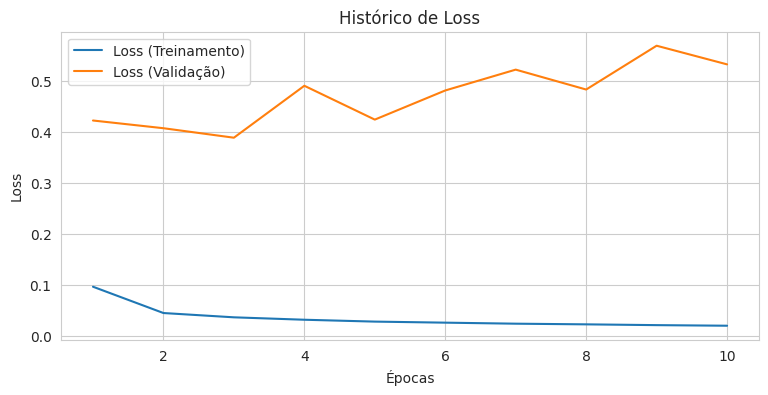

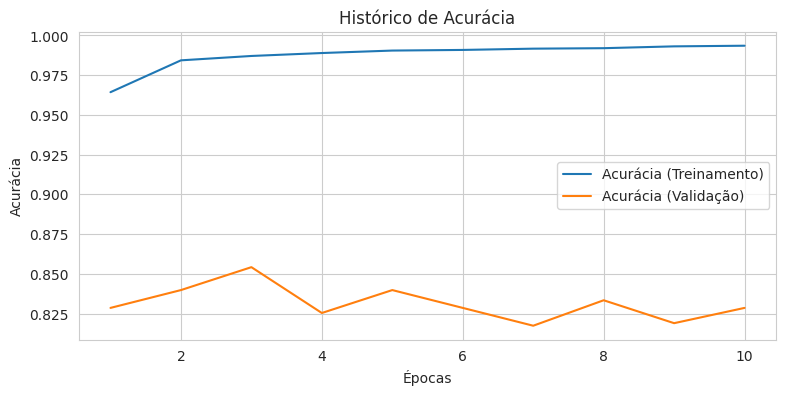

20/20 [==============================] - 2s 39ms/step


Modelo: MobileNetV3Large
Tempo: 5.0 min
Acurácia: 82.85
Precisão: 79.54
Recall: 97.69
F1-Score: 87.69
Matriz de Confusão:
[[136  98]
 [  9 381]]





In [ ]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
# Carregar o modelo DenseNet121 pré-treinado
MobileNetV3Large_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in MobileNetV3Large_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = MobileNetV3Large_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

# Crie um novo modelo com a nova camada de saída
model = Model(inputs=MobileNetV3Large_model.input, outputs=x)

treinamento(model,10,'MobileNetV3Large')

Epoch 1/10
626/626 [==============================] - 96s 131ms/step - loss: 0.1976 - accuracy: 0.9343 - val_loss: 0.6173 - val_accuracy: 0.7484
Epoch 2/10
626/626 [==============================] - 82s 130ms/step - loss: 0.0928 - accuracy: 0.9628 - val_loss: 0.5577 - val_accuracy: 0.7740
Epoch 3/10
626/626 [==============================] - 83s 133ms/step - loss: 0.0796 - accuracy: 0.9688 - val_loss: 0.6506 - val_accuracy: 0.7468
Epoch 4/10
626/626 [==============================] - 84s 134ms/step - loss: 0.0734 - accuracy: 0.9694 - val_loss: 0.6693 - val_accuracy: 0.7452
Epoch 5/10
626/626 [==============================] - 84s 134ms/step - loss: 0.0675 - accuracy: 0.9724 - val_loss: 0.5796 - val_accuracy: 0.7917
Epoch 6/10
626/626 [==============================] - 82s 130ms/step - loss: 0.0647 - accuracy: 0.9732 - val_loss: 0.6111 - val_accuracy: 0.7853
Epoch 7/10
626/626 [==============================] - 83s 133ms/step - loss: 0.0618 - accuracy: 0.9753 - val_loss: 0.6620 - val_ac

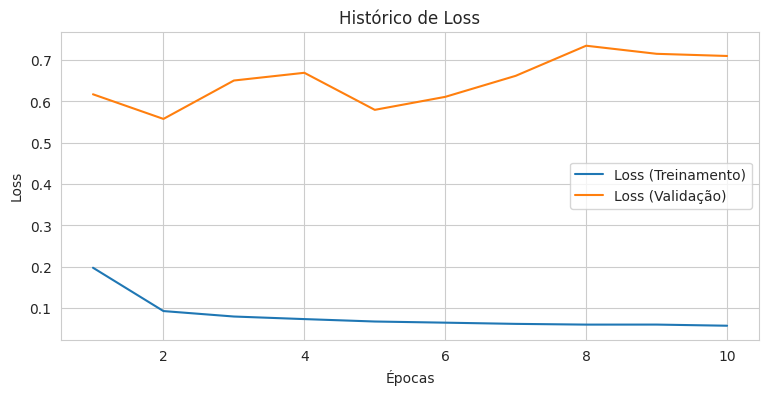

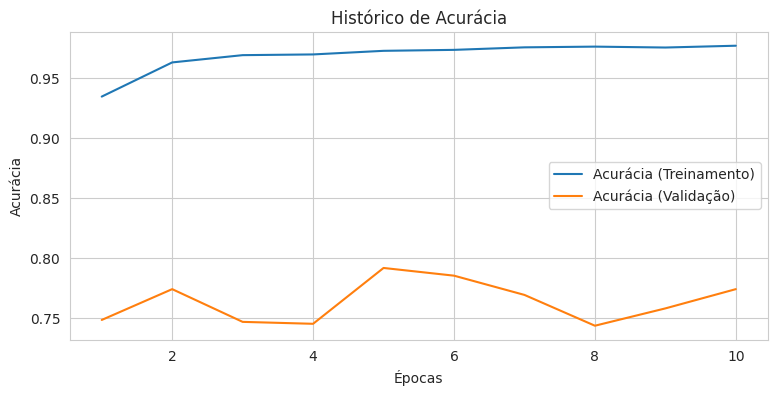

20/20 [==============================] - 3s 121ms/step


Modelo: Xception
Tempo: 17.0 min
Acurácia: 77.4
Precisão: 75.78
Recall: 93.85
F1-Score: 83.85
Matriz de Confusão:
[[117 117]
 [ 24 366]]





In [14]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
# Carregar o modelo Xception pré-treinado
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congele as camadas pré-treinadas
for layer in xception_model.layers:
    layer.trainable = False

# Adicione uma nova camada de saída para classificação binária
x = xception_model.output
x = GlobalAveragePooling2D()(x)  # Adicione uma camada de pooling global
x = Dense(1, activation='sigmoid')(x)  # Camada de saída com ativação sigmoid para classificação binária

# Crie um novo modelo com a nova camada de saída
model = Model(inputs=xception_model.input, outputs=x)

treinamento(model, 10, 'Xception')

# Parte VI

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers

# Definindo o modelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
treinamento(model, 10, 'modelo1')

Epoch 1/5
626/626 [==============================] - 93s 142ms/step - loss: 39.6237 - accuracy: 0.9369 - val_loss: 6.7039 - val_accuracy: 0.7228
Epoch 2/5
626/626 [==============================] - 88s 140ms/step - loss: 5.3083 - accuracy: 0.9700 - val_loss: 5.6051 - val_accuracy: 0.7821
Epoch 3/5
626/626 [==============================] - 88s 140ms/step - loss: 5.2618 - accuracy: 0.9802 - val_loss: 5.8754 - val_accuracy: 0.8606
Epoch 4/5
626/626 [==============================] - 88s 140ms/step - loss: 5.6879 - accuracy: 0.9797 - val_loss: 6.0051 - val_accuracy: 0.8317
Epoch 5/5
626/626 [==============================] - 88s 141ms/step - loss: 5.7443 - accuracy: 0.9834 - val_loss: 6.4157 - val_accuracy: 0.8125


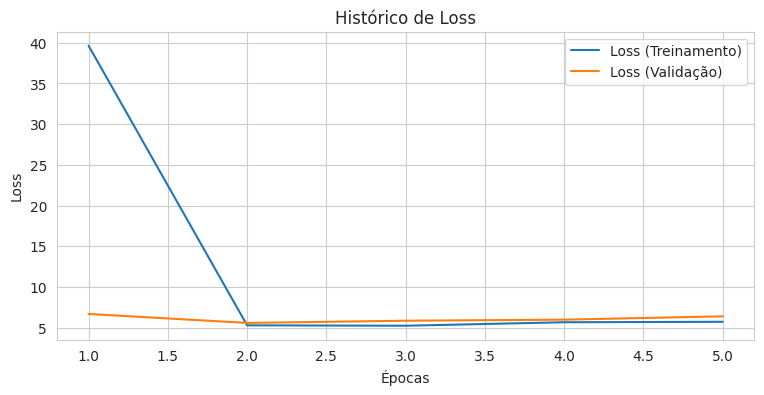

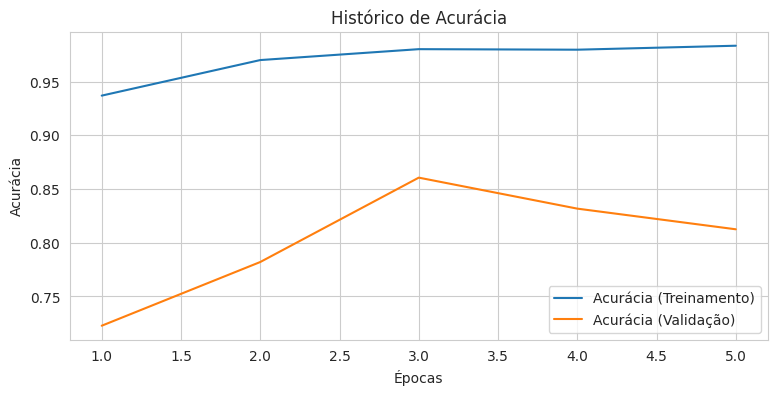

20/20 [==============================] - 1s 38ms/step


Modelo: modelo2
Tempo: 7.0 min
Acurácia: 81.25
Precisão: 78.98
Recall: 95.38
F1-Score: 86.41
Matriz de Confusão:
[[135  99]
 [ 18 372]]





In [ ]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(512, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(1024, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(2048, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

treinamento(model, 10, 'modelo2')

Epoch 1/5


Exception ignored in: <function _xla_gc_callback at 0x7a83d6a1e710>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


626/626 [==============================] - 131s 65ms/step - loss: 0.6203 - accuracy: 0.9844 - val_loss: 6.3176 - val_accuracy: 0.8606
Epoch 2/5
626/626 [==============================] - 39s 63ms/step - loss: 0.2850 - accuracy: 0.9918 - val_loss: 15.2993 - val_accuracy: 0.7965
Epoch 3/5
626/626 [==============================] - 39s 62ms/step - loss: 0.1167 - accuracy: 0.9962 - val_loss: 15.6584 - val_accuracy: 0.7788
Epoch 4/5
626/626 [==============================] - 38s 61ms/step - loss: 0.0933 - accuracy: 0.9967 - val_loss: 21.6476 - val_accuracy: 0.7612
Epoch 5/5
626/626 [==============================] - 38s 61ms/step - loss: 0.0924 - accuracy: 0.9962 - val_loss: 27.4472 - val_accuracy: 0.7821


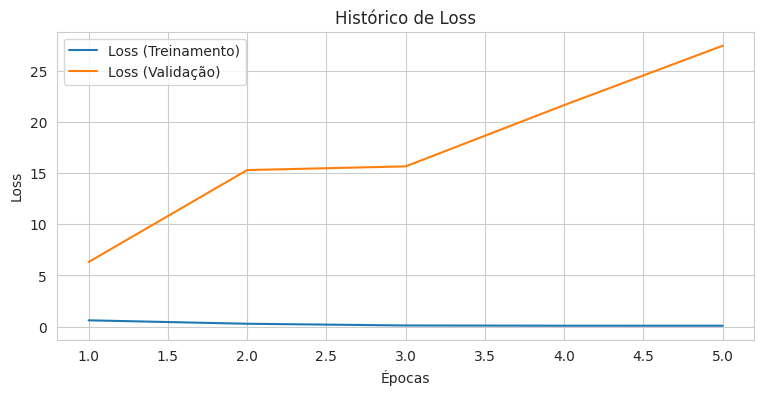

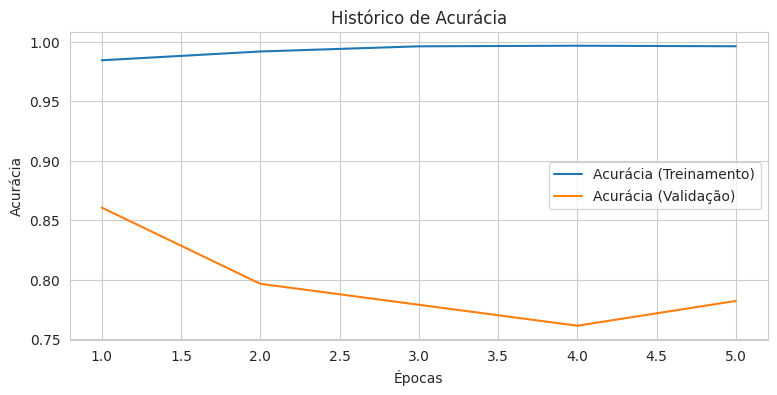

20/20 [==============================] - 2s 37ms/step


Modelo: modeloVGG16
Tempo: 6.0 min
Acurácia: 78.21
Precisão: 74.14
Recall: 100.0
F1-Score: 85.15
Matriz de Confusão:
[[ 98 136]
 [  0 390]]





In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


# Carregar o modelo pré-treinado sem incluir as camadas densas no topo
base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar as camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

# Adicionar camadas personalizadas no topo do modelo base
model = Sequential([
    base_model,
    Flatten(),
    Dense(2048, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

treinamento(model, 10, 'MobileNetV3Large')